### Problem Statement :
-  A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
-  The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- The company wants to know:
  -  Which variables are significant in predicting the price of a house, and
  -  How well those variables describe the price of a house.

-  Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Reading the data.

In [3]:
df = pd.read_csv(r'train.csv')

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Step 2 : Data Cleaning / Handling Null Values

In [8]:
# Dropping the Id columns does not serve any purpose for Inference. Just acts as index
df.drop('Id', axis=1, inplace=True)

In [9]:
# Checking the null values in dataset
null_cols = round(((df.isna().sum()/len(df)) *100),0)
print(null_cols[null_cols != 0])

LotFrontage      18.0
Alley            94.0
MasVnrType       60.0
MasVnrArea        1.0
BsmtQual          3.0
BsmtCond          3.0
BsmtExposure      3.0
BsmtFinType1      3.0
BsmtFinType2      3.0
FireplaceQu      47.0
GarageType        6.0
GarageYrBlt       6.0
GarageFinish      6.0
GarageQual        6.0
GarageCond        6.0
PoolQC          100.0
Fence            81.0
MiscFeature      96.0
dtype: float64


In [10]:
#function to fill missing values
def fill_missing_value(col, val):
    df[col].fillna(val ,inplace=True)

In [11]:
# These given columns have NA as in category which is not null so imputing it as None instead os NaN value.
na_cols = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for var in na_cols:
    fill_missing_value(var, 'None')

In [12]:
# LotFrontage being numeical type replacing missing values with median

print(f'Median : {df.LotFrontage.median()}')
fill_missing_value('LotFrontage', df.LotFrontage.median())

Median : 69.0


In [13]:
# MasVnrArea being numeical type replacing missing values with median

print(f'MasVnrArea : {df.LotFrontage.median()}')
fill_missing_value('MasVnrArea', df.MasVnrArea.median())

MasVnrArea : 69.0


In [14]:
# GarageYrBltbeing an categorical column replacing null values with Mode.

print(f'GarageYrBlt : {df.GarageYrBlt.value_counts().index[0]}')
fill_missing_value('GarageYrBlt', df.GarageYrBlt.value_counts().index[0])

GarageYrBlt : 2005.0


In [15]:
# Electrical an categorical column replacing null values with Mode.

print(f'Electrical : {df.GarageYrBlt.value_counts().index[0]}')
fill_missing_value('Electrical', df.Electrical.value_counts().index[0])

Electrical : 2005.0


In [16]:
# Rechecking any NaN Values left to impute
null_cols = ((df.isna().sum()/len(df)) *100)
print(null_cols[null_cols != 0])

Series([], dtype: float64)


In [17]:
# Drop the following columns that have more than 85% values associated to a specific value
# Method to get the column names that have count of one value more than 85%
#85/100 * 1460 = 1241

def geLowVarianceCategoricalValueCounts():
    column = []
    categorical_columns = df.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = geLowVarianceCategoricalValueCounts()

# Remove the columns with skewed data
df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story            7            5       2003          2003   
1     1Fam     1Story            6            8       1976          1976   
2     1Fam     2Story            7            5       2001          2002   
3     1Fam     2Story            7            5       1915          1970   
4     1Fam     2Story            8            5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0      PConc       Gd           No          GLQ         706           0   
1     CBlock       Gd           Gd          ALQ         978           0   
2      PConc       Gd           Mn          GLQ         486           0   
3     BrkTil       TA           No          ALQ         216           0   
4      PConc       Gd           Av          GLQ         655           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             1          Gd             8           0        None     Attchd   
1             1          TA             6           1          TA     Attchd   
2             1          Gd             6           1          TA     Attchd   
3             1          Gd             7           1          Gd     Detchd   
4             1          Gd             9           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0          RFn           2         548           0           61   
1       1976.0          RFn           2         460         298            0   
2       2001.0          RFn           2         608           0           42   
3       1998.0          Unf           3         642           0           35   
4       2000.0          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea Fence  MiscVal  MoSold  \
0              0          0            0         0  None        0       2   
1              0          0            0         0  None        0       5   
2              0          0            0         0  None        0       9   
3  

In [18]:
df.shape

(1460, 59)

In [19]:
#Creating a derived column from YearBuilt and YearRemodAdd to check if the house is mod or not

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['IsRemodelled'] = df.apply(checkForRemodel, axis=1)
df.head()   

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story            7            5       2003          2003   
1     1Fam     1Story            6            8       1976          1976   
2     1Fam     2Story            7            5       2001          2002   
3     1Fam     2Story            7            5       1915          1970   
4     1Fam     2Story            8            5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0      PConc       Gd           No          GLQ         706           0   
1     CBlock       Gd           Gd          ALQ         978           0   
2      PConc       Gd           Mn          GLQ         486           0   
3     BrkTil       TA           No          ALQ         216           0   
4      PConc       Gd           Av          GLQ         655           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             1          Gd             8           0        None     Attchd   
1             1          TA             6           1          TA     Attchd   
2             1          Gd             6           1          TA     Attchd   
3             1          Gd             7           1          Gd     Detchd   
4             1          Gd             9           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0          RFn           2         548           0           61   
1       1976.0          RFn           2         460         298            0   
2       2001.0          RFn           2         608           0           42   
3       1998.0          Unf           3         642           0           35   
4       2000.0          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea Fence  MiscVal  MoSold  \
0              0          0            0         0  None        0       2   
1              0          0            0         0  None        0       5   
2              0          0            0         0  None        0       9   
3  

In [20]:
# Extrating the age of the house based on remod or yearblt

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['BuiltOrRemodelAge'] = df.apply(getBuiltOrRemodelAge, axis=1)
df.head()  

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     1Fam     2Story            7            5       2003          2003   
1     1Fam     1Story            6            8       1976          1976   
2     1Fam     2Story            7            5       2001          2002   
3     1Fam     2Story            7            5       1915          1970   
4     1Fam     2Story            8            5       2000          2000   

  RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable     MetalSd     MetalSd       None         0.0        TA   
2     Gable     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable     VinylSd     VinylSd    BrkFace       350.0        Gd   

  Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  \
0      PConc       Gd           No          GLQ         706           0   
1     CBlock       Gd           Gd          ALQ         978           0   
2      PConc       Gd           Mn          GLQ         486           0   
3     BrkTil       TA           No          ALQ         216           0   
4      PConc       Gd           Av          GLQ         655           0   

   BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        150          856        Ex       856       854             0   
1        284         1262        Ex      1262         0             0   
2        434          920        Ex       920       866             0   
3        540          756        Gd       961       756             0   
4        490         1145        Ex      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             1          Gd             8           0        None     Attchd   
1             1          TA             6           1          TA     Attchd   
2             1          Gd             6           1          TA     Attchd   
3             1          Gd             7           1          Gd     Detchd   
4             1          Gd             9           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0          RFn           2         548           0           61   
1       1976.0          RFn           2         460         298            0   
2       2001.0          RFn           2         608           0           42   
3       1998.0          Unf           3         642           0           35   
4       2000.0          RFn           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea Fence  MiscVal  MoSold  \
0              0          0            0         0  None        0       2   
1              0          0            0         0  None        0       5   
2              0          0            0         0  None        0       9   
3  

In [21]:
# dropping the columns based on which the new columns were derived

df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold'], axis = 1, inplace = True)

In [22]:
#Dropping the numerical columns which has low variance means it has maximum data belonging to a single category

def getLowVarianceNumericalValueCounts():
    column = []
    numerical_columns = df.select_dtypes(include=['int64', 'float64'])
    for col in (numerical_columns):
        if(df[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getLowVarianceNumericalValueCounts()
df.drop(columnsToBeRemoved, axis = 1, inplace = True)

df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0           No          GLQ         706        150          856        Ex   
1           Gd          ALQ         978        284         1262        Ex   
2           Mn          GLQ         486        434          920        Ex   
3           No          ALQ         216        540          756        Gd   
4           Av          GLQ         655        490         1145        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces FireplaceQu GarageType  \
0             3          Gd             8           0        None     Attchd   
1             3          TA             6           1          TA     Attchd   
2             3          Gd             6           1          TA     Attchd   
3             3          Gd             7           1          Gd     Detchd   
4             4          Gd             9           1          TA     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0          RFn           2         548           0           61   
1       1976.0          RFn           2         460         298            0   
2       2001.0          RFn           2         608           0           42   
3       1998.0          Unf           3         642           0           35   
4       2000.0          RFn           3         836         192           84   

  Fence SaleCondition  SalePrice  IsRemodelled  BuiltOrRemodelAge  
0  None        Normal     208500             0                  5  
1  None        Normal     181500             0                 31  
2  None        Normal     223500             1                  6  
3  None       Abnorml     140000             1                 36  
4  None        Normal     250000             0                  8

In [23]:
df.shape

(1460, 48)

In [24]:
df.isna().sum()/len(df) *100

MSSubClass           0.0
MSZoning             0.0
LotFrontage          0.0
LotArea              0.0
LotShape             0.0
LotConfig            0.0
Neighborhood         0.0
BldgType             0.0
HouseStyle           0.0
OverallQual          0.0
OverallCond          0.0
RoofStyle            0.0
Exterior1st          0.0
Exterior2nd          0.0
MasVnrType           0.0
MasVnrArea           0.0
ExterQual            0.0
Foundation           0.0
BsmtQual             0.0
BsmtExposure         0.0
BsmtFinType1         0.0
BsmtFinSF1           0.0
BsmtUnfSF            0.0
TotalBsmtSF          0.0
HeatingQC            0.0
1stFlrSF             0.0
2ndFlrSF             0.0
GrLivArea            0.0
BsmtFullBath         0.0
FullBath             0.0
HalfBath             0.0
BedroomAbvGr         0.0
KitchenQual          0.0
TotRmsAbvGrd         0.0
Fireplaces           0.0
FireplaceQu          0.0
GarageType           0.0
GarageYrBlt          0.0
GarageFinish         0.0
GarageCars           0.0


##### Dividing into Categorical and Numerical Data

In [25]:
num_vars = df.select_dtypes(include=['int64', 'float64']).columns
print(num_vars)

cat_vars = df.select_dtypes(include=['object']).columns
print(cat_vars)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'IsRemodelled', 'BuiltOrRemodelAge'],
      dtype='object')
Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'Fence', 'SaleCondition'],
      dtype='object')


In [26]:
df[cat_vars].head()

MSZoning LotShape LotConfig Neighborhood BldgType HouseStyle RoofStyle  \
0       RL      Reg    Inside      CollgCr     1Fam     2Story     Gable   
1       RL      Reg       FR2      Veenker     1Fam     1Story     Gable   
2       RL      IR1    Inside      CollgCr     1Fam     2Story     Gable   
3       RL      IR1    Corner      Crawfor     1Fam     2Story     Gable   
4       RL      IR1       FR2      NoRidge     1Fam     2Story     Gable   

  Exterior1st Exterior2nd MasVnrType ExterQual Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
1     MetalSd     MetalSd       None        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1 HeatingQC KitchenQual FireplaceQu GarageType  \
0           No          GLQ        Ex          Gd        None     Attchd   
1           Gd          ALQ        Ex          TA          TA     Attchd   
2           Mn          GLQ        Ex          Gd          TA     Attchd   
3           No          ALQ        Gd          Gd          Gd     Detchd   
4           Av          GLQ        Ex          Gd          TA     Attchd   

  GarageFinish Fence SaleCondition  
0          RFn  None        Normal  
1          RFn  None        Normal  
2          RFn  None        Normal  
3          Unf  None       Abnorml  
4          RFn  None        Normal

In [27]:
df[num_vars].head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
0             1         2         1             3             8           0   
1             0         2         0             3             6           1   
2             1         2         1             3             6           1   
3             1         1         0             3             7           1   
4             1         2         1             4             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  \
0       2003.0           2         548           0           61     208500   
1       1976.0           2         460         298            0     181500   
2       2001.0           2         608           0           42     223500   
3       1998.0           3         642           0           35     140000   
4       2000.0           3         836         192           84     250000   

   IsRemodelled  BuiltOrRemodelAge  
0             0                  5  
1             0                 31  
2             1                  6  
3             1                 36  
4             0                  8

### Step 3 : Performing EDA

##### UNIVARIATE ANALYSIS :  On numerical data for Checking the distribution of values and detecting Outliers

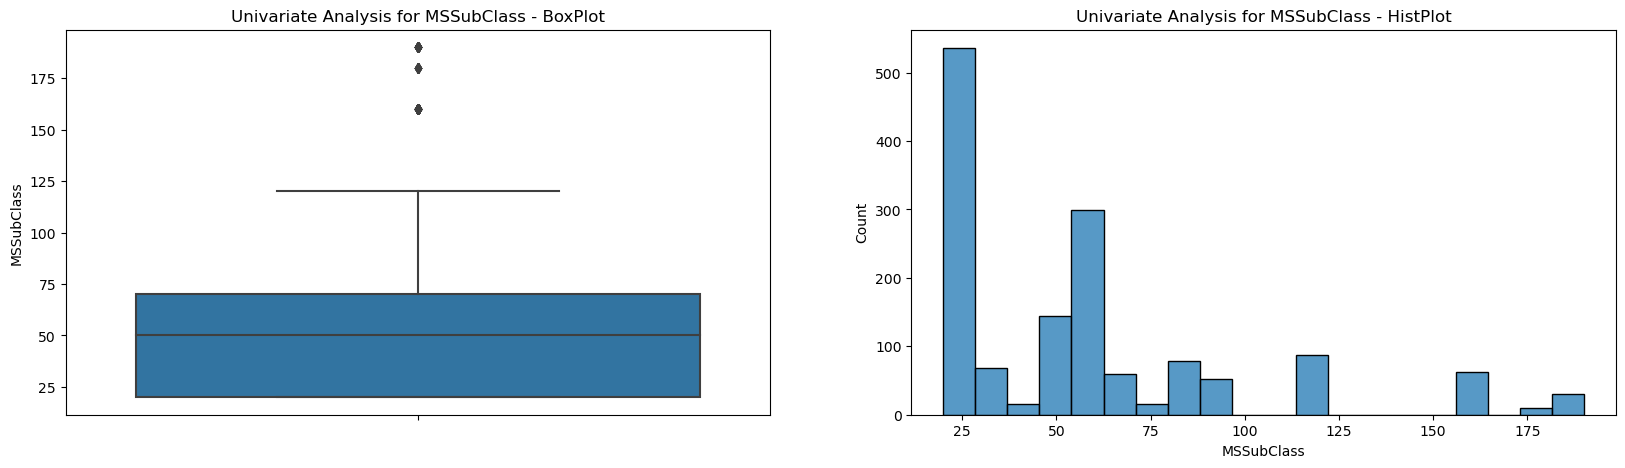

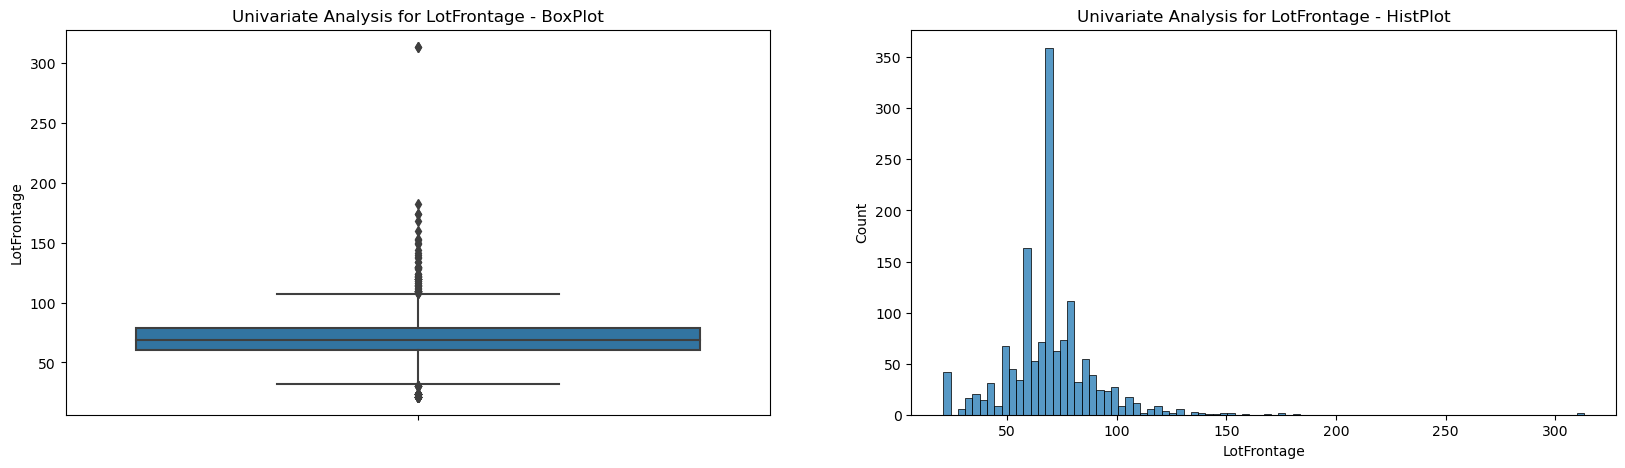

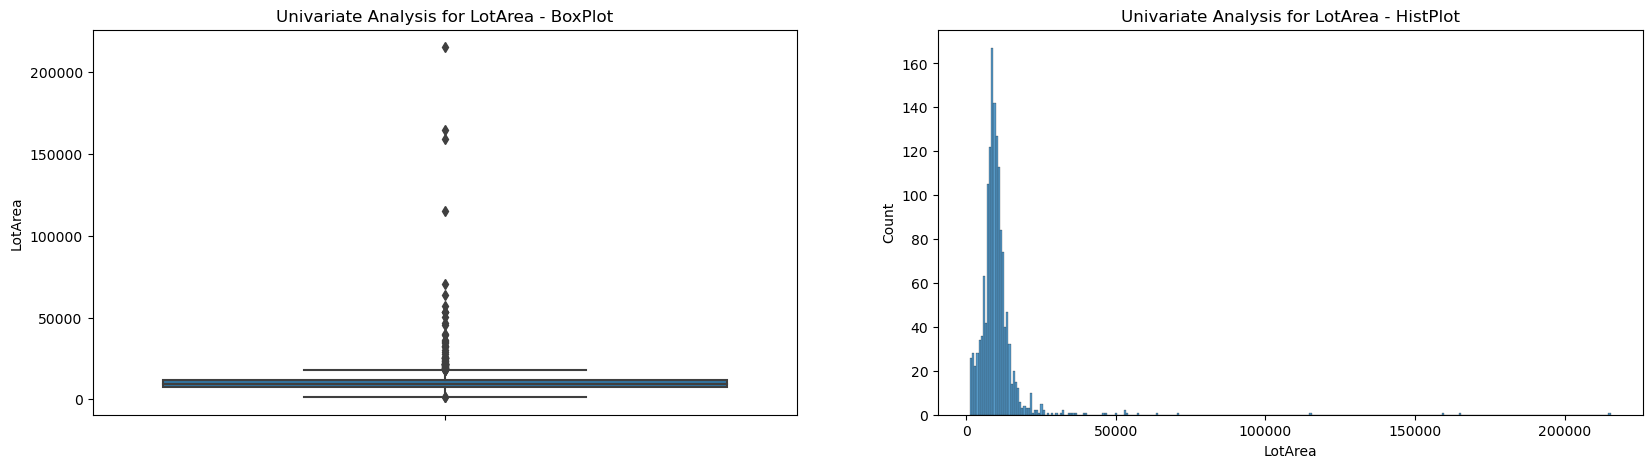

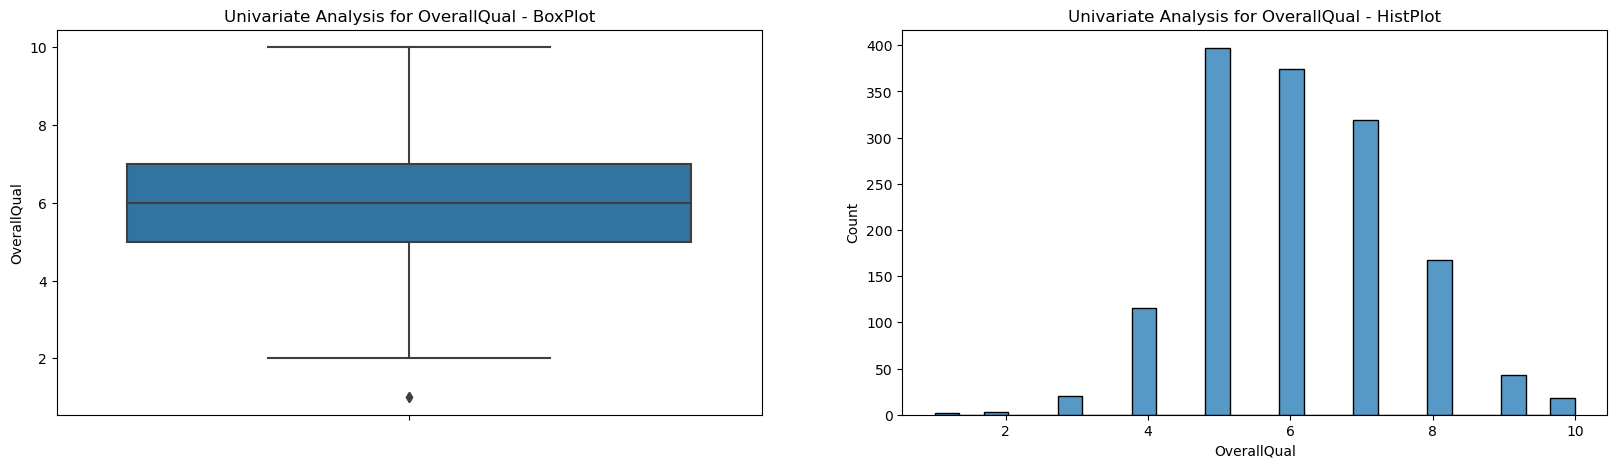

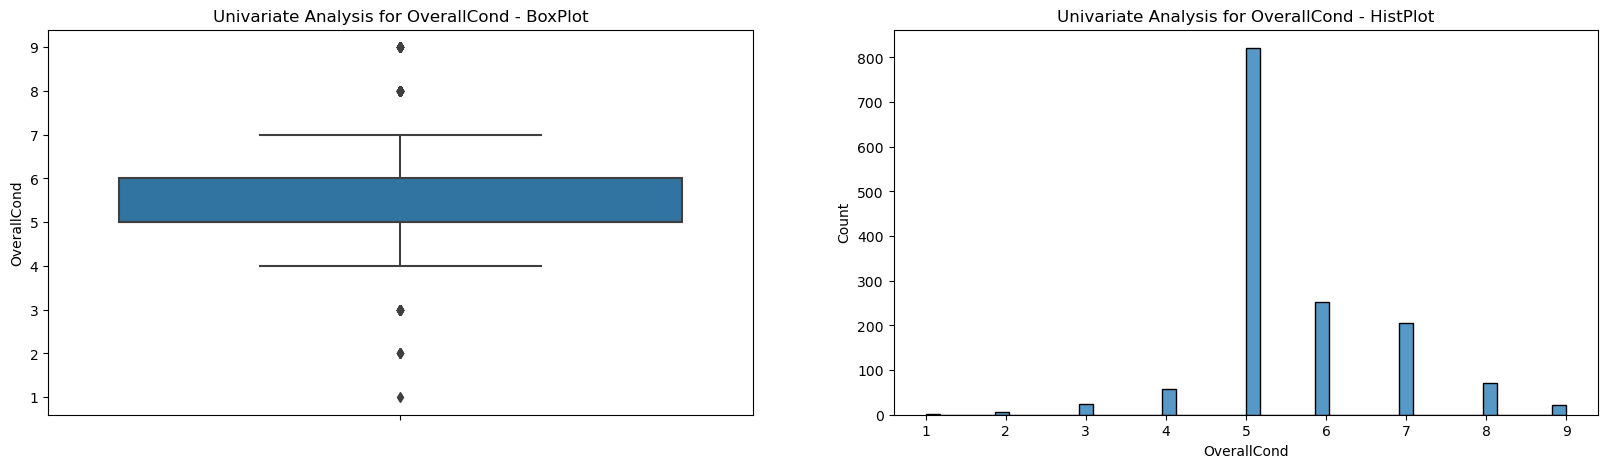

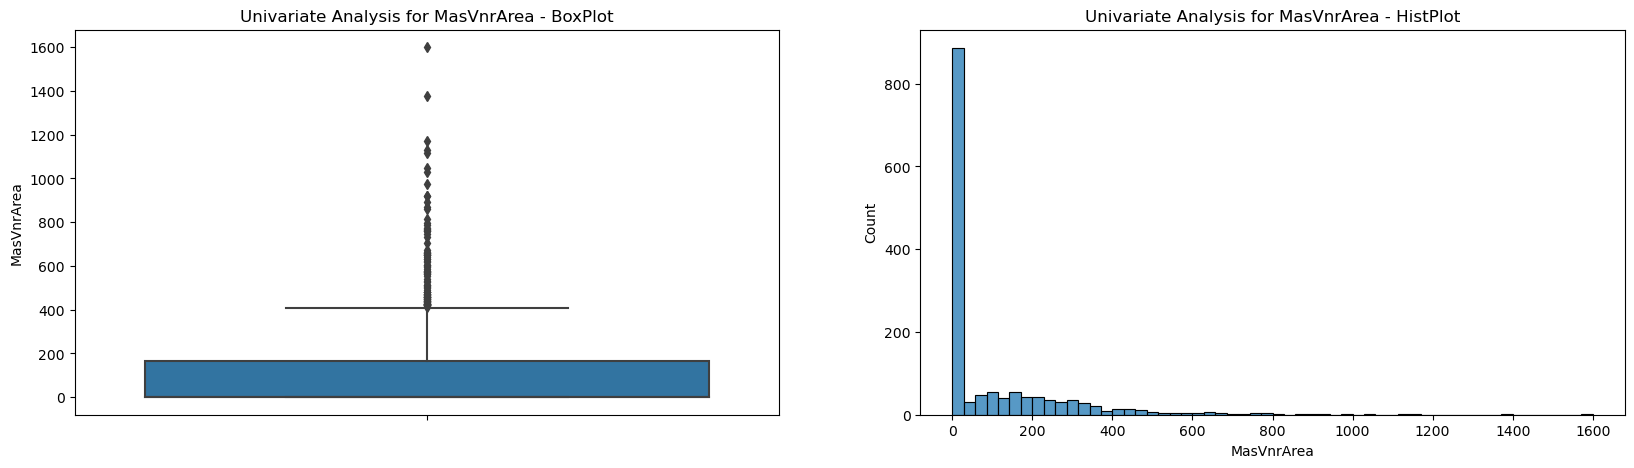

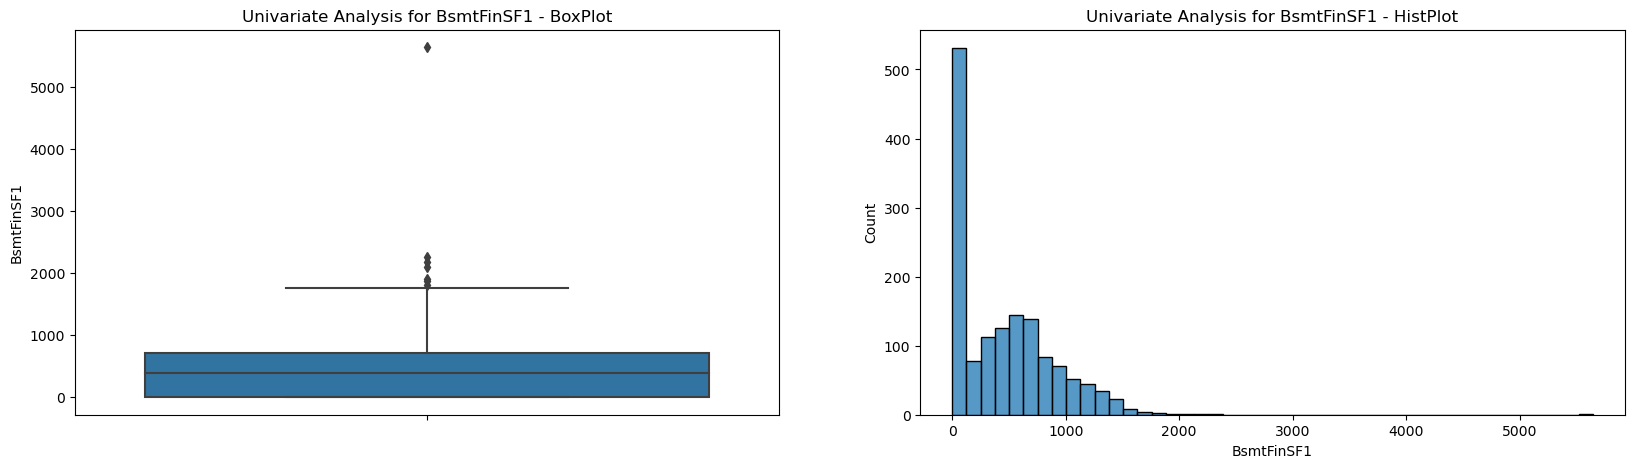

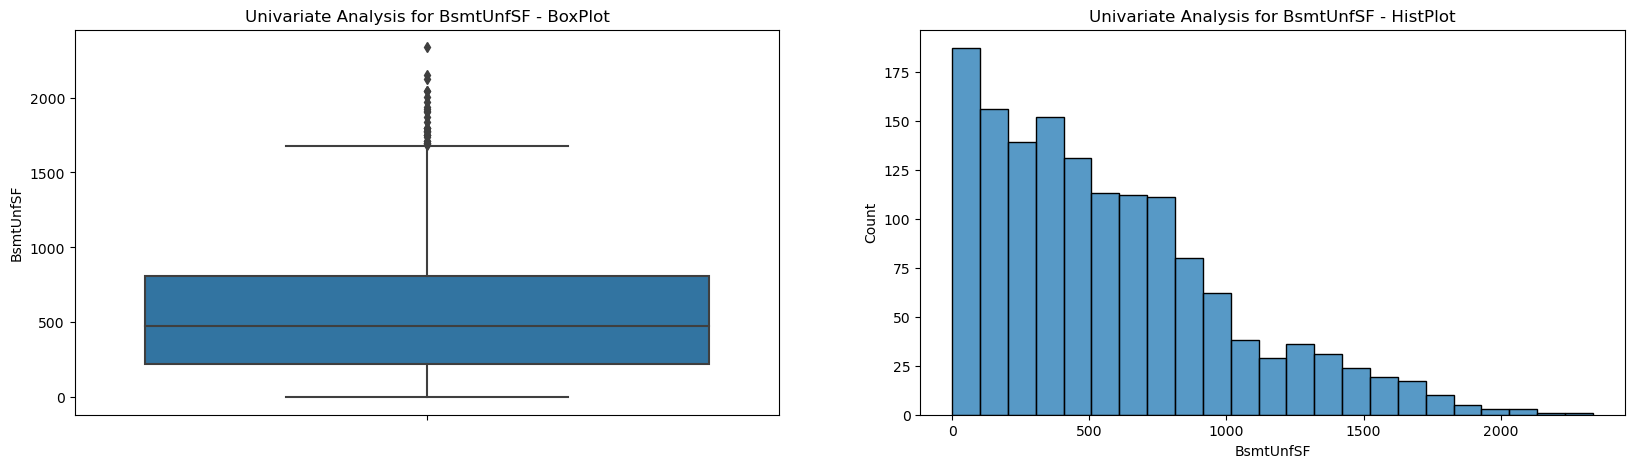

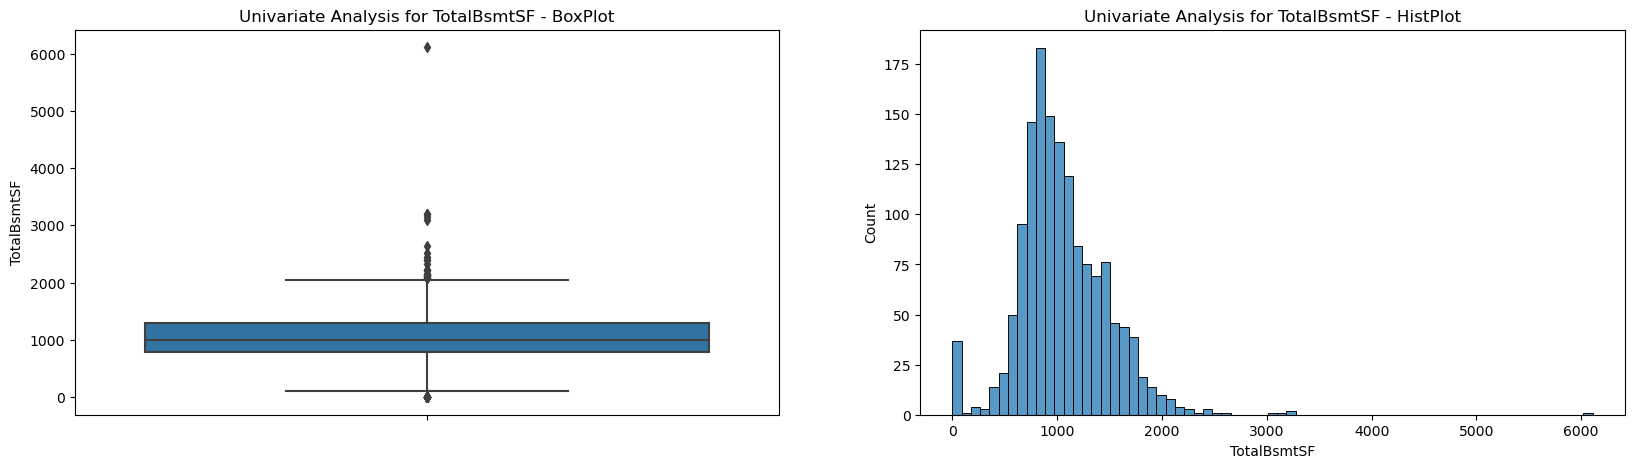

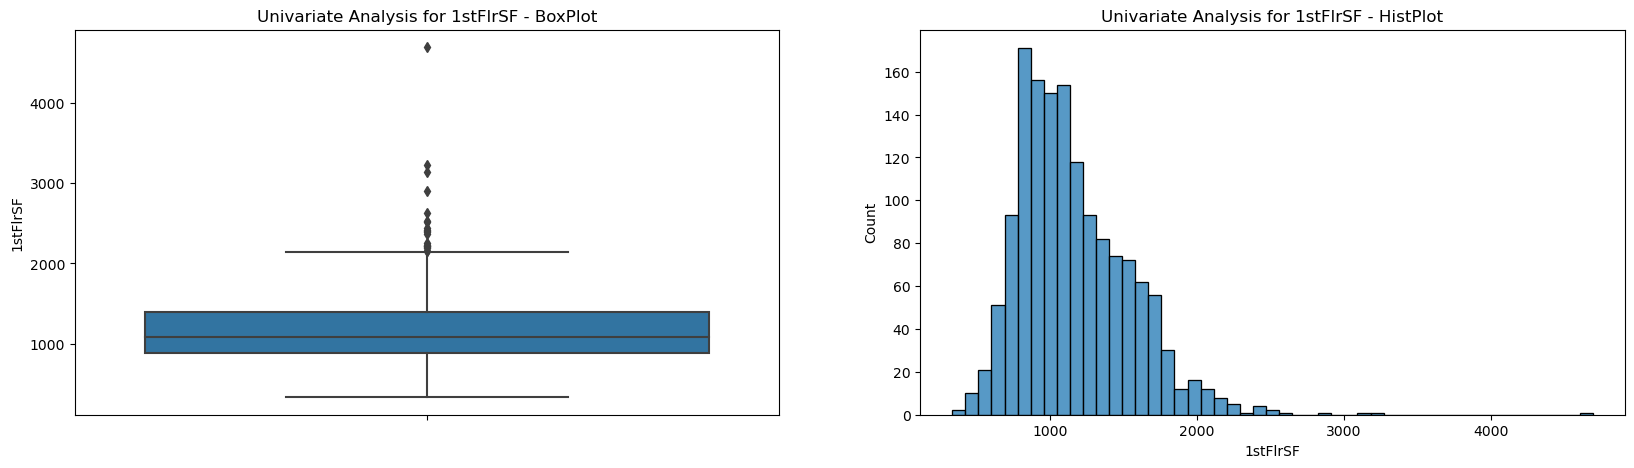

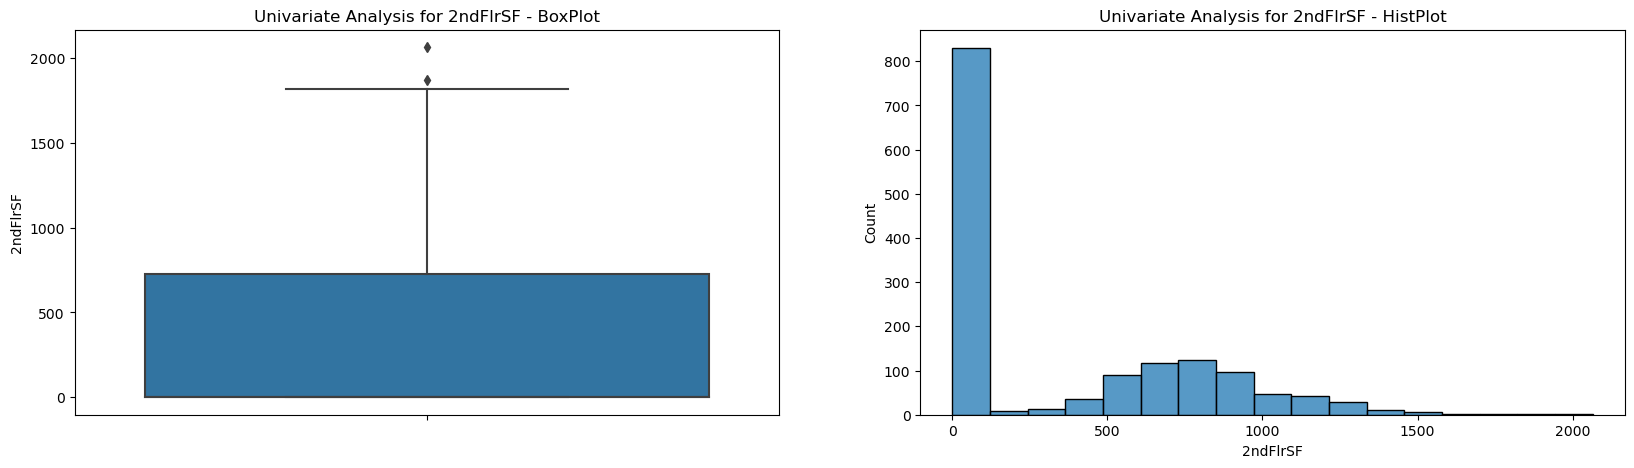

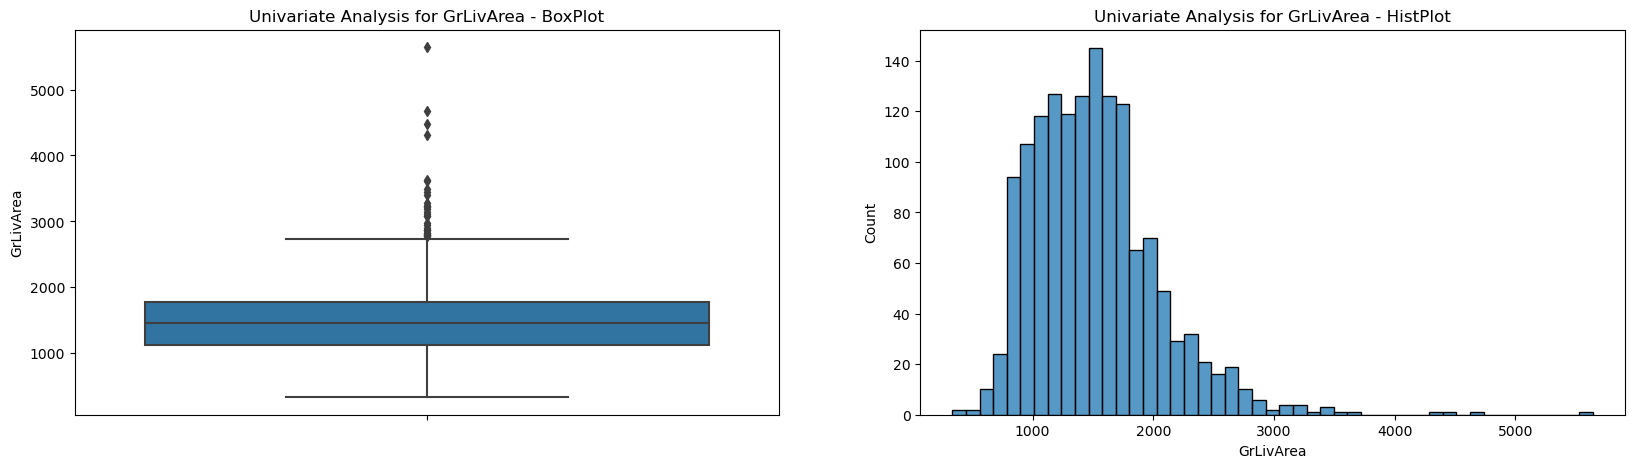

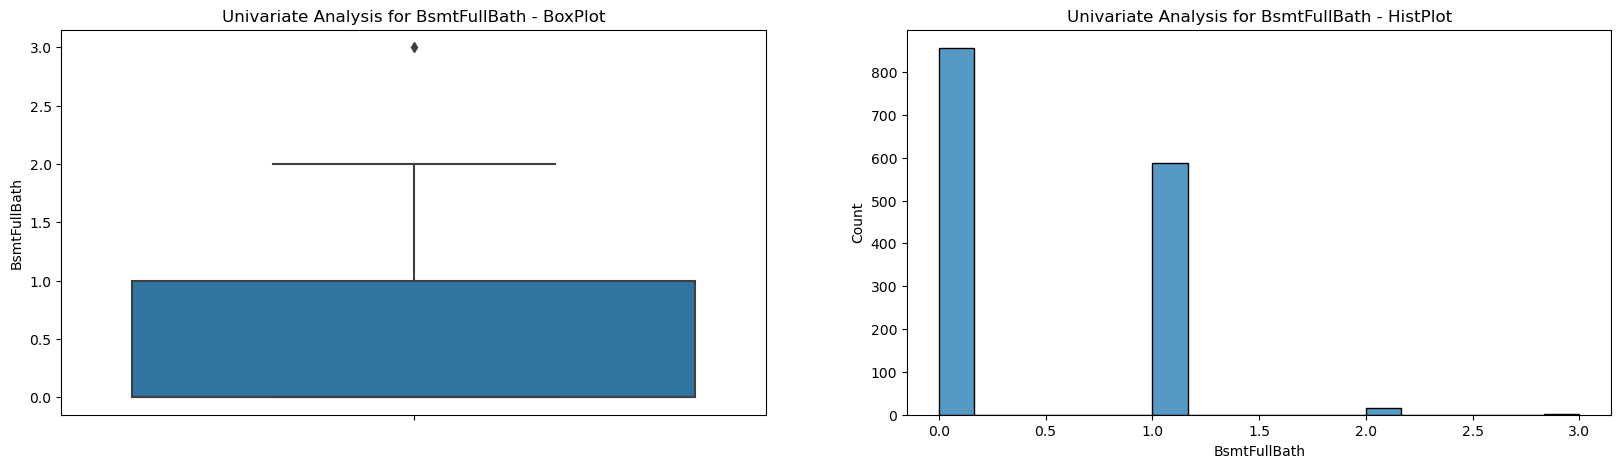

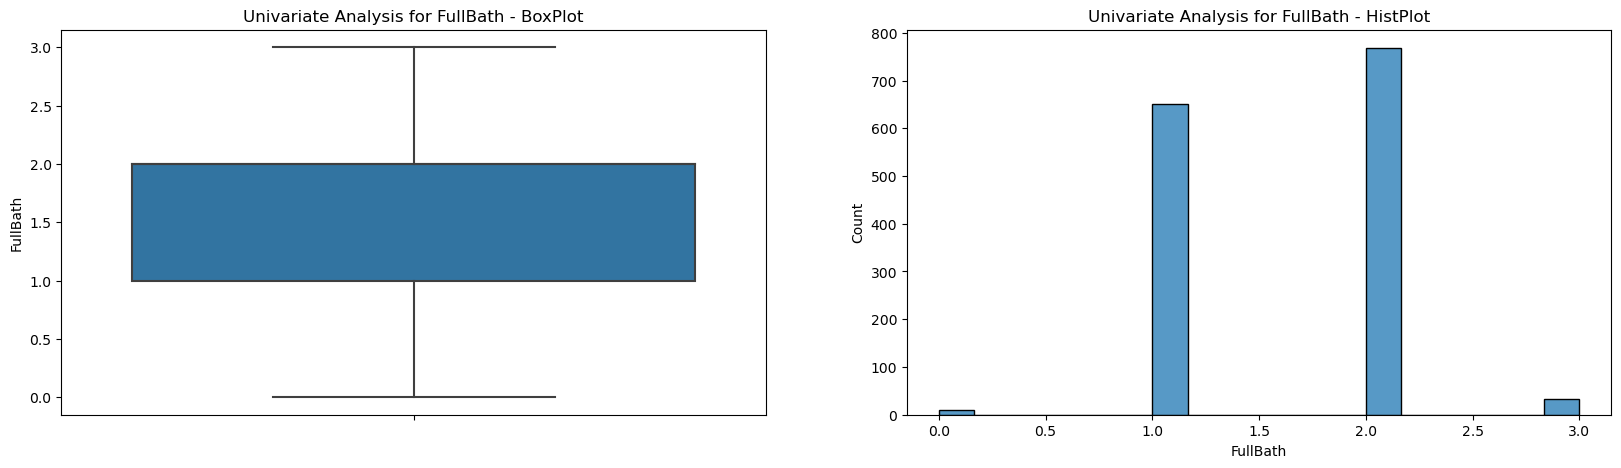

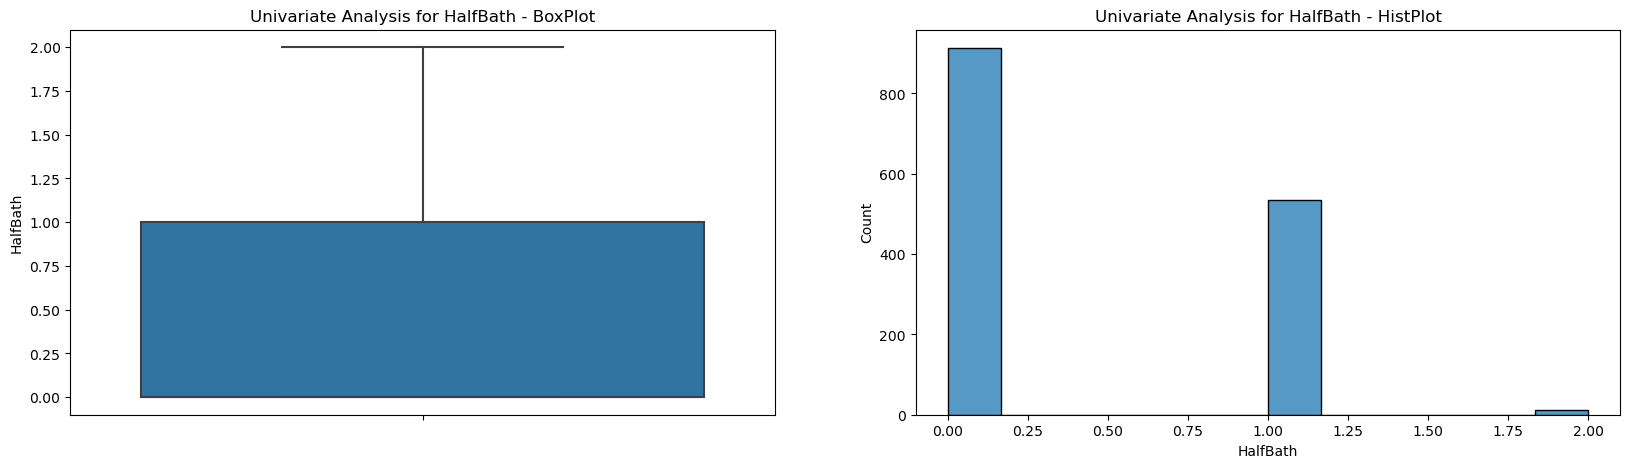

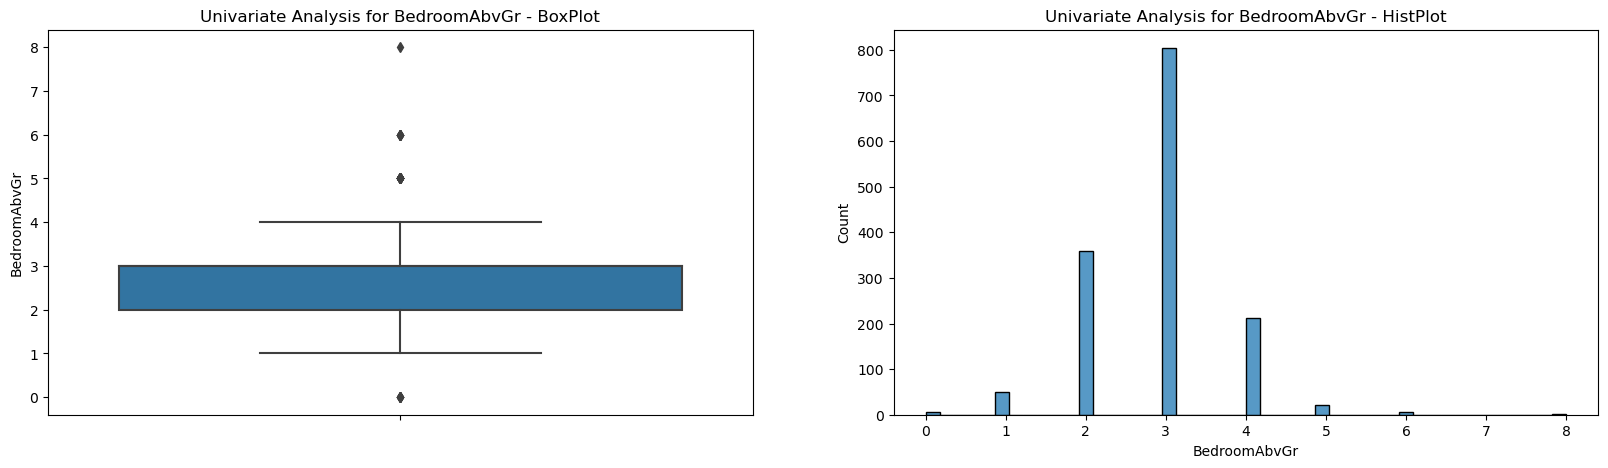

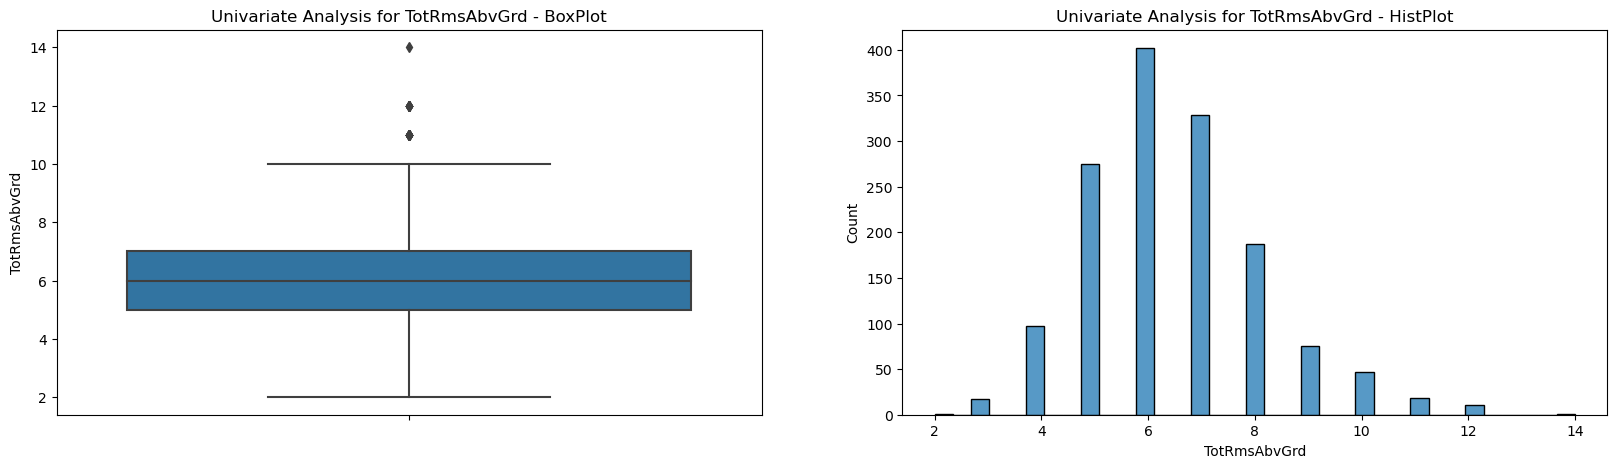

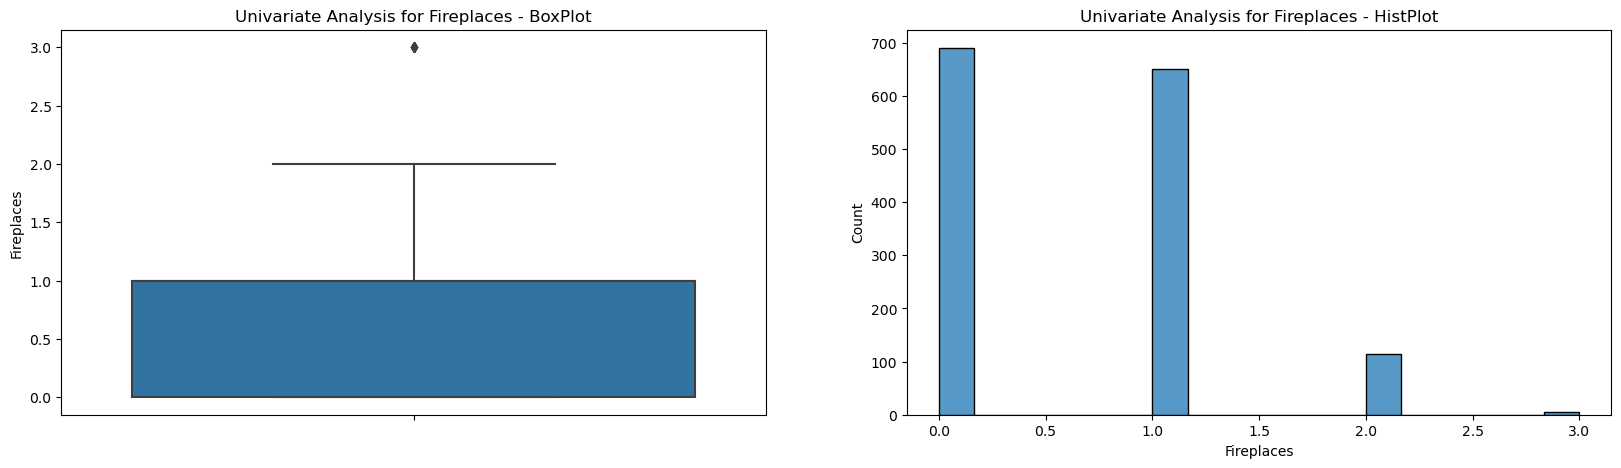

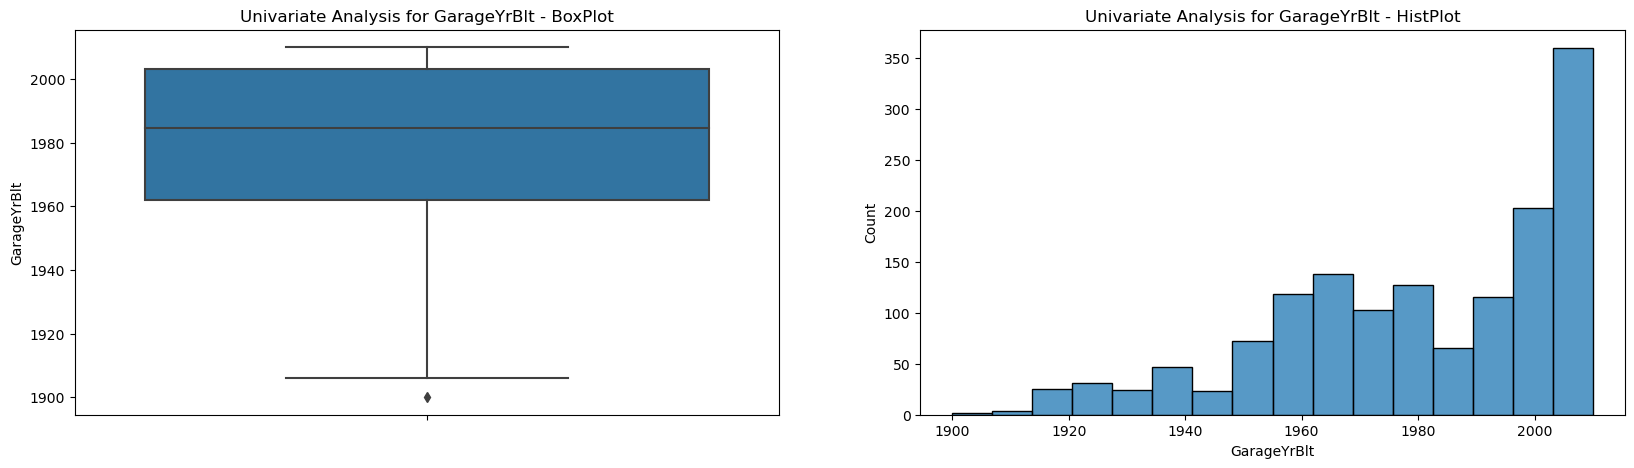

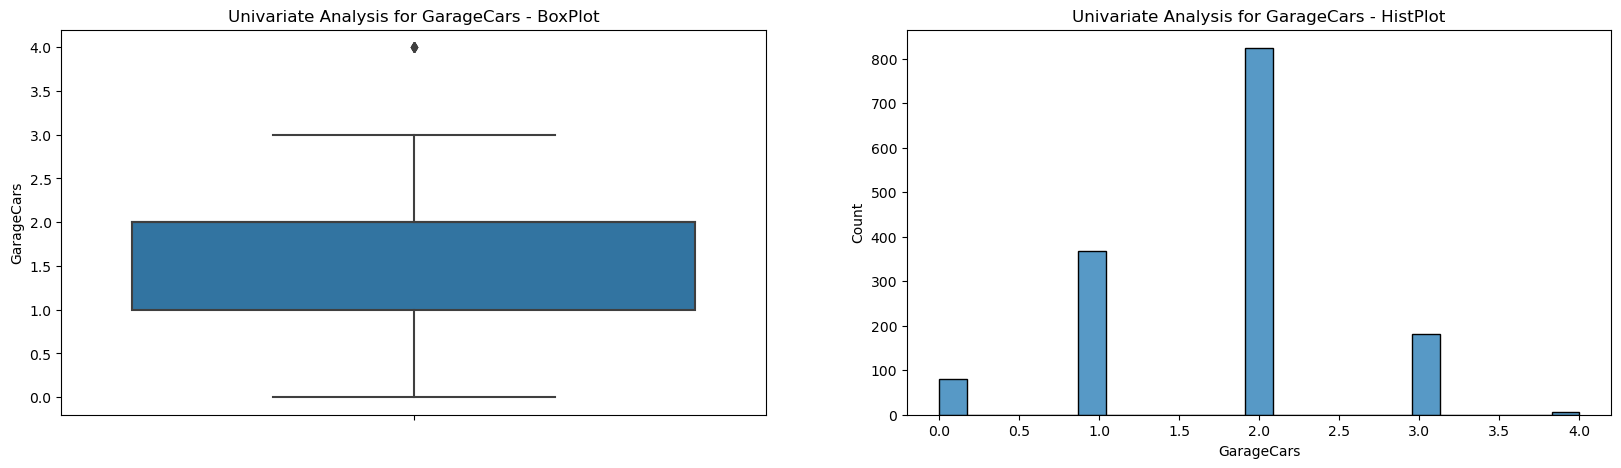

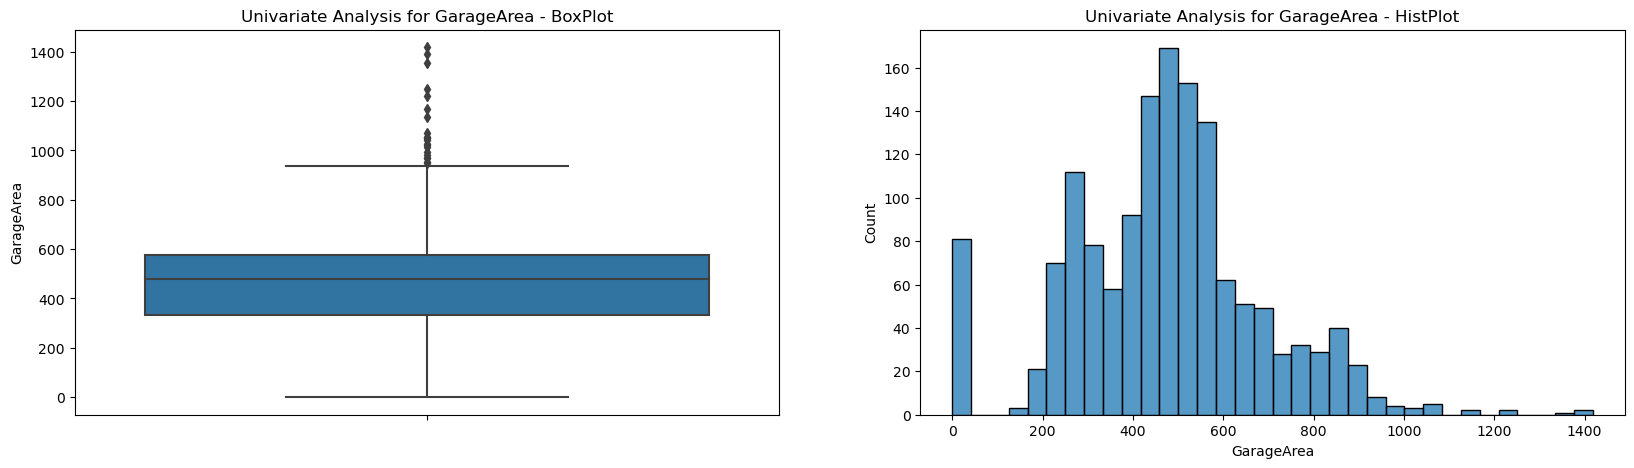

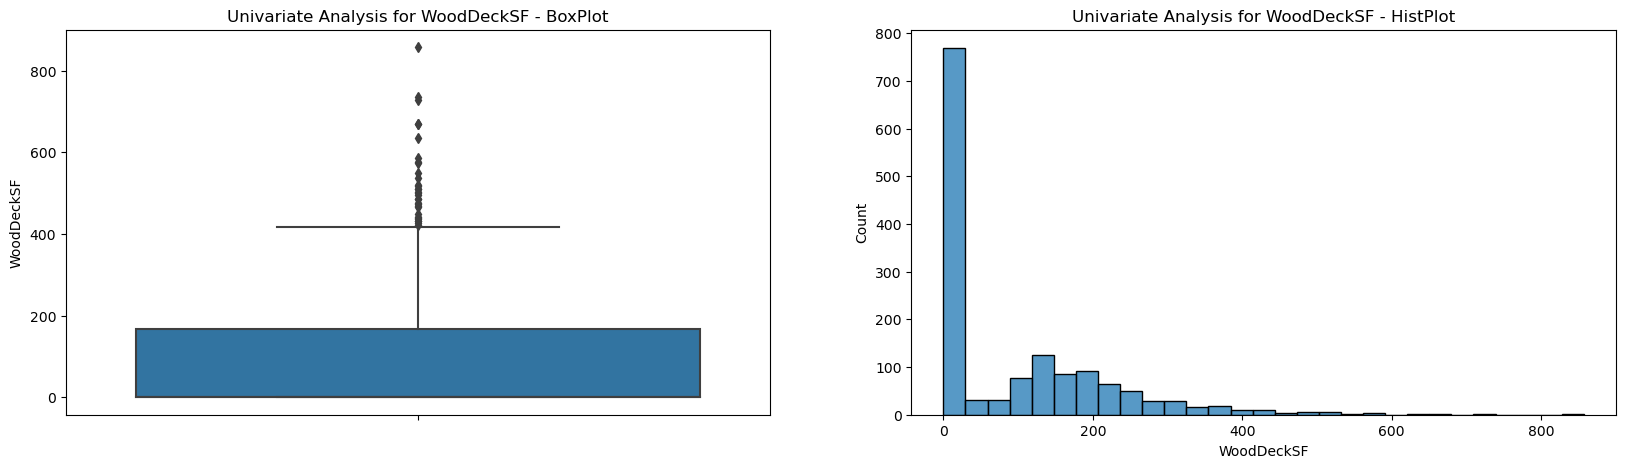

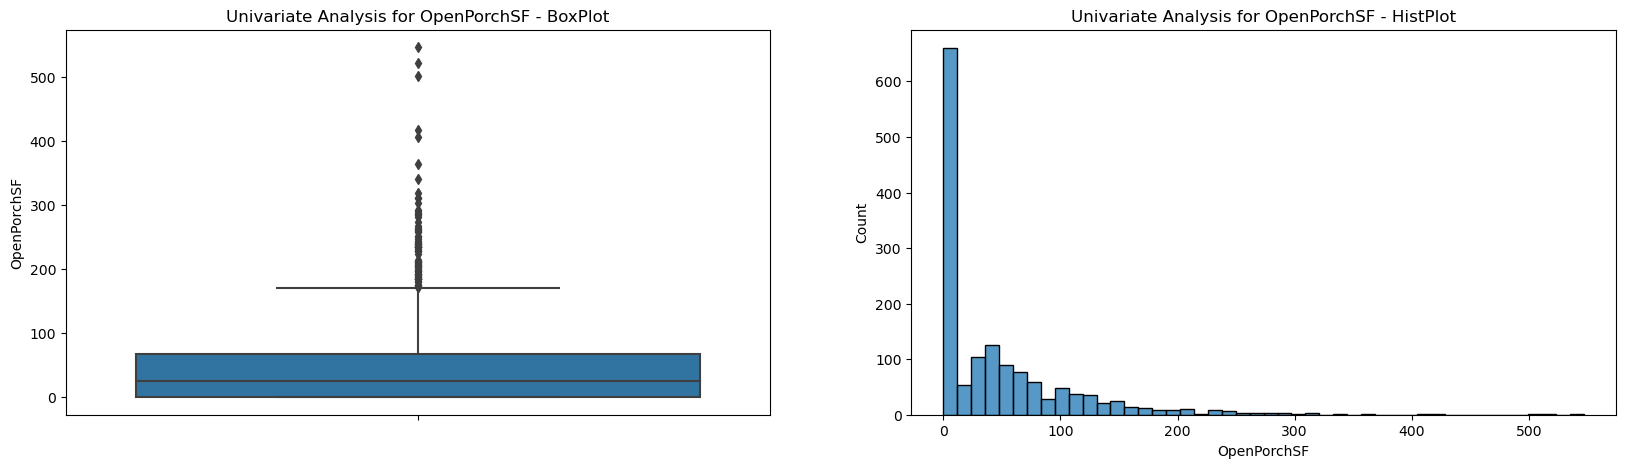

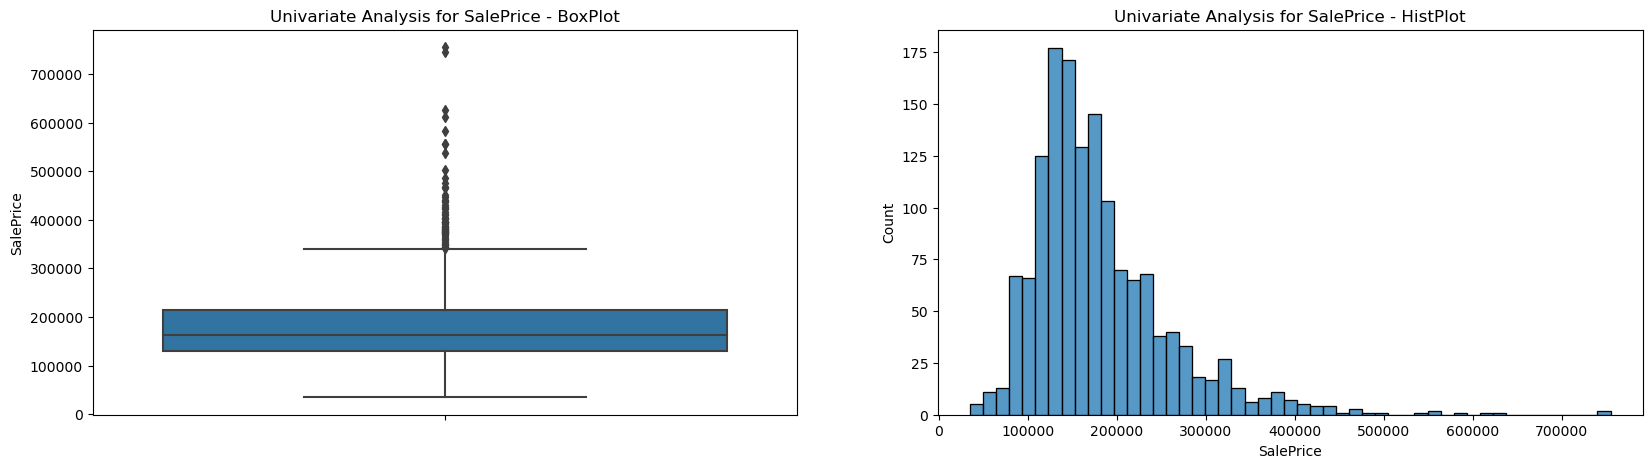

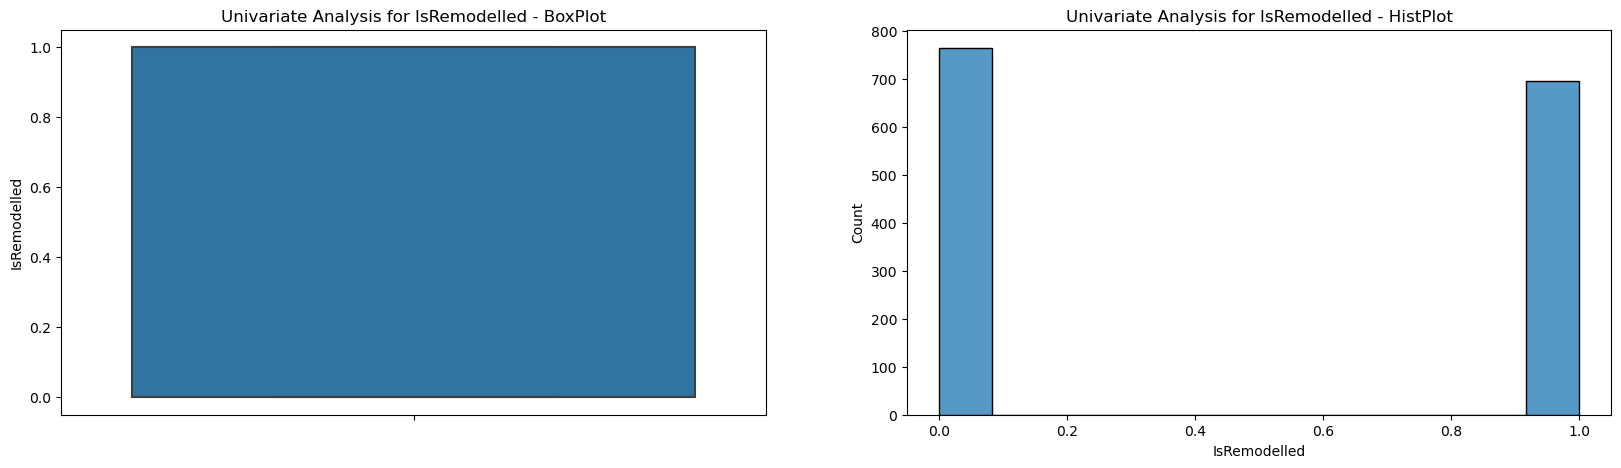

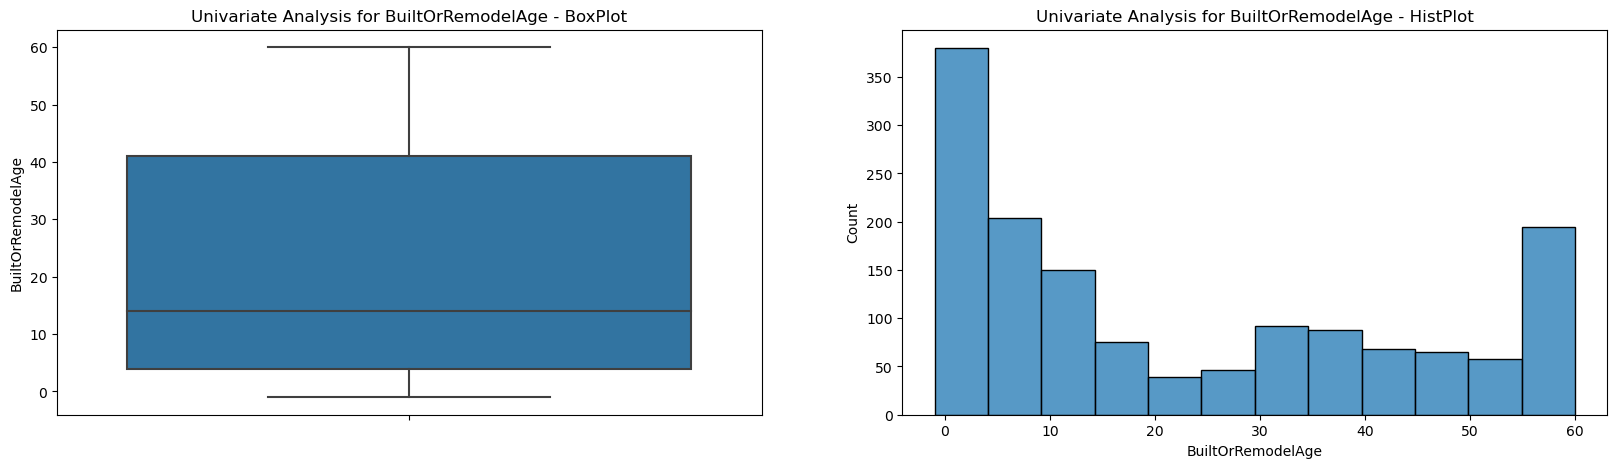

In [28]:
for var in num_vars:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(df, y=var)
    plt.title(f"Univariate Analysis for {var} - BoxPlot")
    plt.subplot(1,2,2)
    sns.histplot(df, x=var)
    plt.title(f"Univariate Analysis for {var} - HistPlot")
    plt.show()

In [29]:
#OutLiers
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082     6.099315     5.575342   
std      42.300571    22.027677    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
90%     120.000000    92.000000   14381.700000     8.000000     7.000000   
95%     160.000000   104.000000   17401.150000     8.000000     8.000000   
99%     190.000000   137.410000   37567.640000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1    BsmtUnfSF  TotalBsmtSF     1stFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.117123   443.639726   567.240411  1057.429452  1162.626712   
std     180.731373   456.098091   441.866955   438.705324   386.587738   
min       0.000000     0.000000     0.000000     0.000000   334.000000   
25%       0.000000     0.000000   223.000000   795.750000   882.000000   
50%       0.000000   383.500000   477.500000   991.500000  1087.000000   
75%     164.250000   712.250000   808.000000  1298.250000  1391.250000   
90%     335.000000  1065.500000  1232.000000  1602.200000  1680.000000   
95%     456.000000  1274.000000  1468.000000  1753.000000  1831.250000   
99%     791.280000  1572.410000  1797.050000  2155.050000  2219.460000   
max    1600.000000  5644.000000  2336.000000  6110.000000  4692.000000   

          2ndFlrSF    GrLivArea  BsmtFullBath     FullBath     HalfBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean    346.992466  1515.463699      0.425342     1.565068     0.382877   
std     436.528436   525.480383      0.518911     0.550916     0.502885   
min       0.000000   334.000000      0.000000     0.000000     0.000000   
25%       0.000000  1129.500000      0.000000     1.000000     0.000000   
50%       0.000000  1464.000000      0.000000     2.000000     0.000000   
75%     728.000000  1776.750000      1.000000     2.000000     1.000000   
90%     954.200000  2158.300000      1.000000     2.000000     1.000000   
95%    1141.050000  2466.100000      1.000000     2.000000     1.000000   
99%    1418.920000  3123.480000      2.000000     3.000000     1.000000   
max    2065.000000  5642.000000      3.000000     3.000000     2.000000   

       BedroomAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       2.866438      6.517808     0.613014  1979.976027     1.767123   
std        0.815778      1.625393     0.644666    24.749688     0.747315   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        2.000000      5.000000     0.000000  1962.000000     1.000000   
50%        3.000000      6.000000     1.000000  1984.500000     2.000000   
75%        3.000000      7.000000     1.000000  2003.000000     2.000000   
90%        4.000000      9.000000     1.000000  2006.000000     3.000000   
95%        4.000000     10.000000     2.000000  2007.000000     3.000000   
99%        5.000000     11.000000     2.000000  2009.000000     3.000000   
max        8.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF      SalePrice  IsRemodelled  \
count  1460.000000  1460.000000  1460.000000    1460.000000   1460.000000   
mean    472.980137    94.244521    46.660274  180921.195890      0.476712   
std     213.804841   125.338794    66.256028   79442.502883      0.499629   
min       0.000000     0.000000     0.000000   34900.000000      0.000000   
25%    

##### As you can see we have outliers in certain columns like 
-  LotArea
-  MasVnrArea
-  TotalBsmtSF
-  WoodDeckSF
-  OpenPorchSF
-  2ndFlrSF

##### But it is advisable not to remove outliers beacuse we already have limited no of records in Dataset 


##### BIVARIATE ANALYSIS : For categorical data comparing with the target value i.e. Sales Price

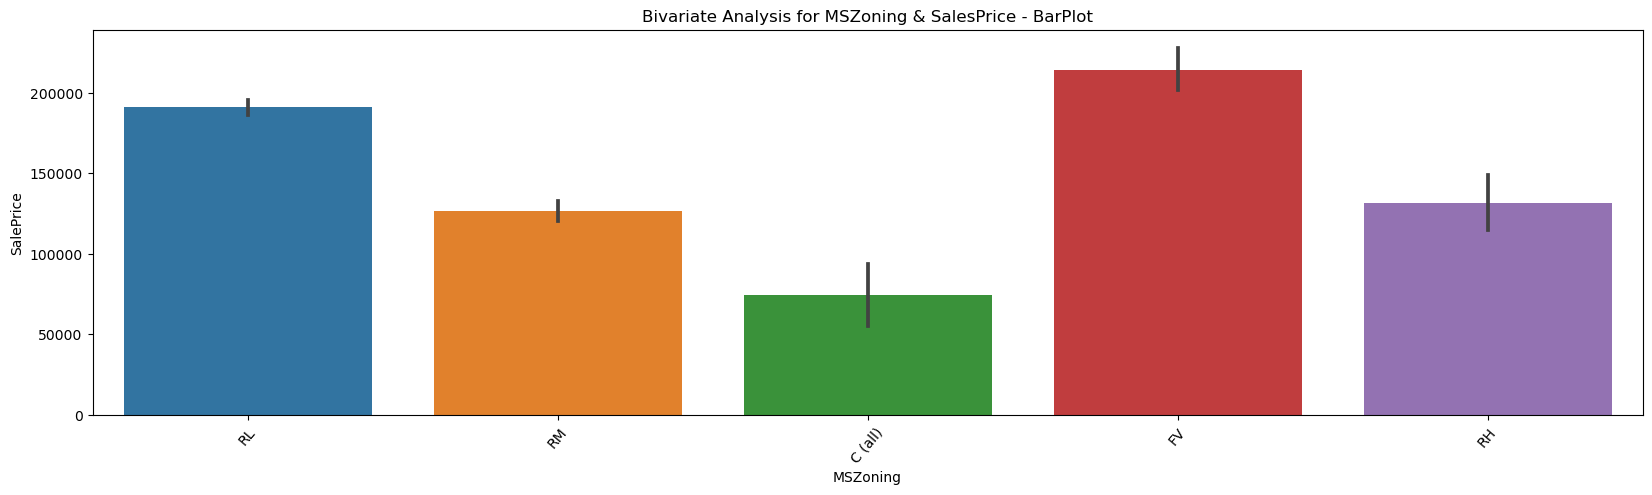

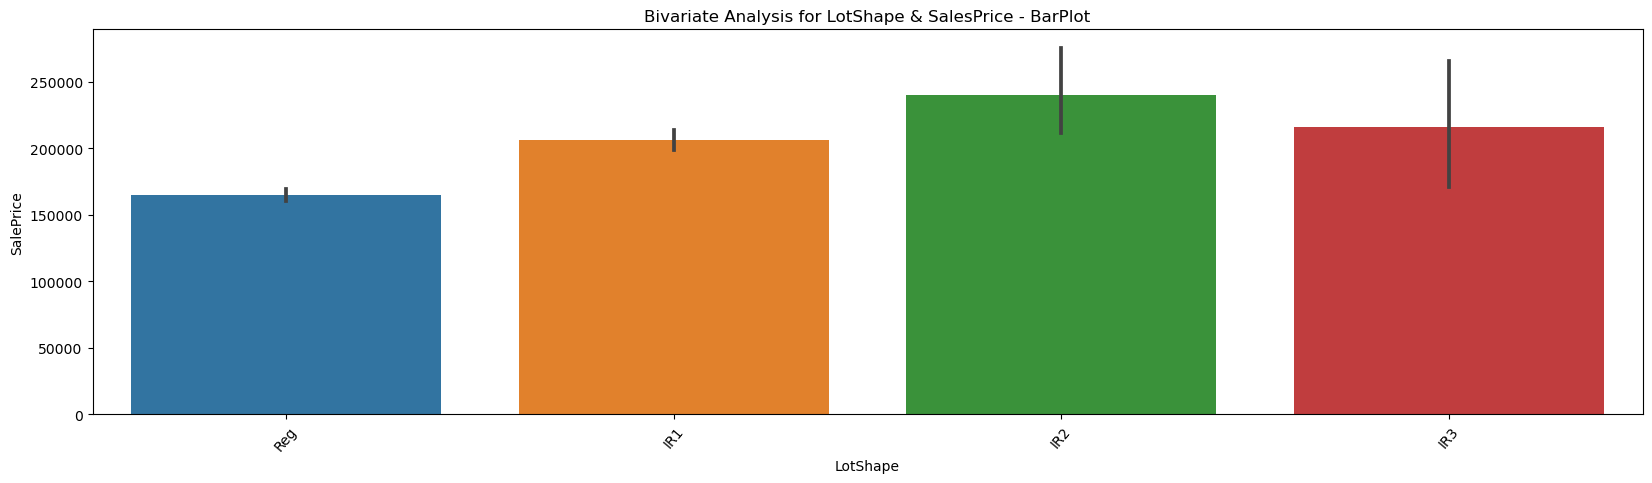

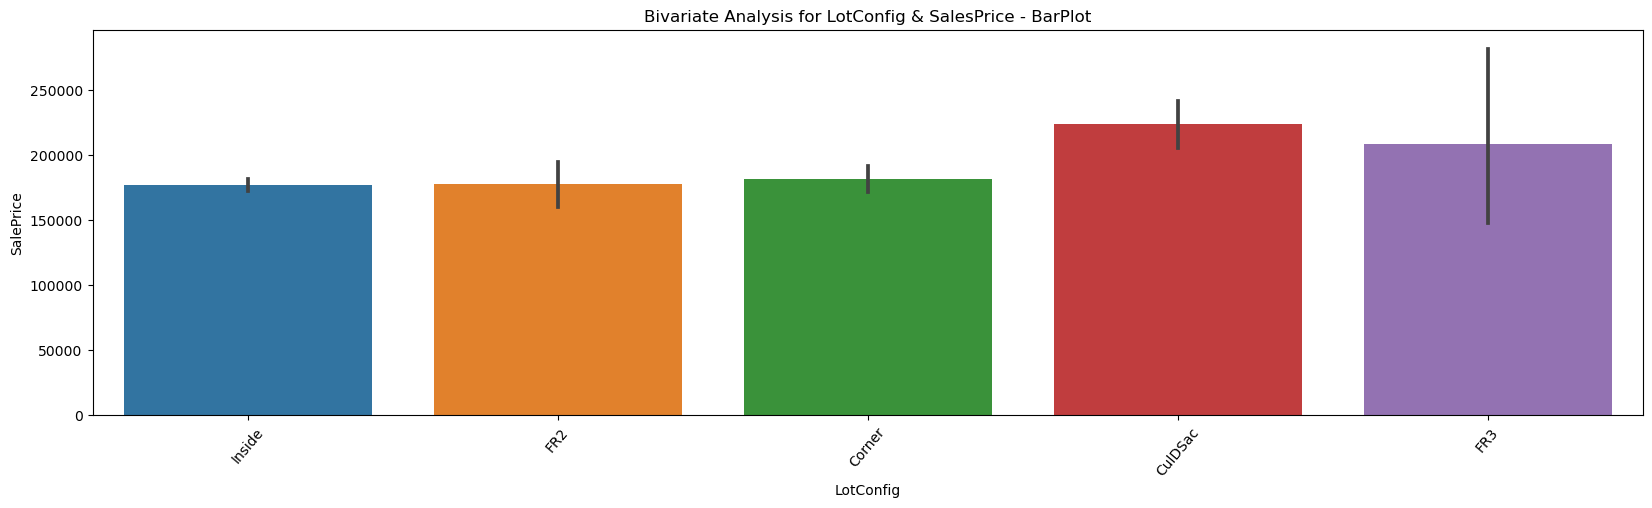

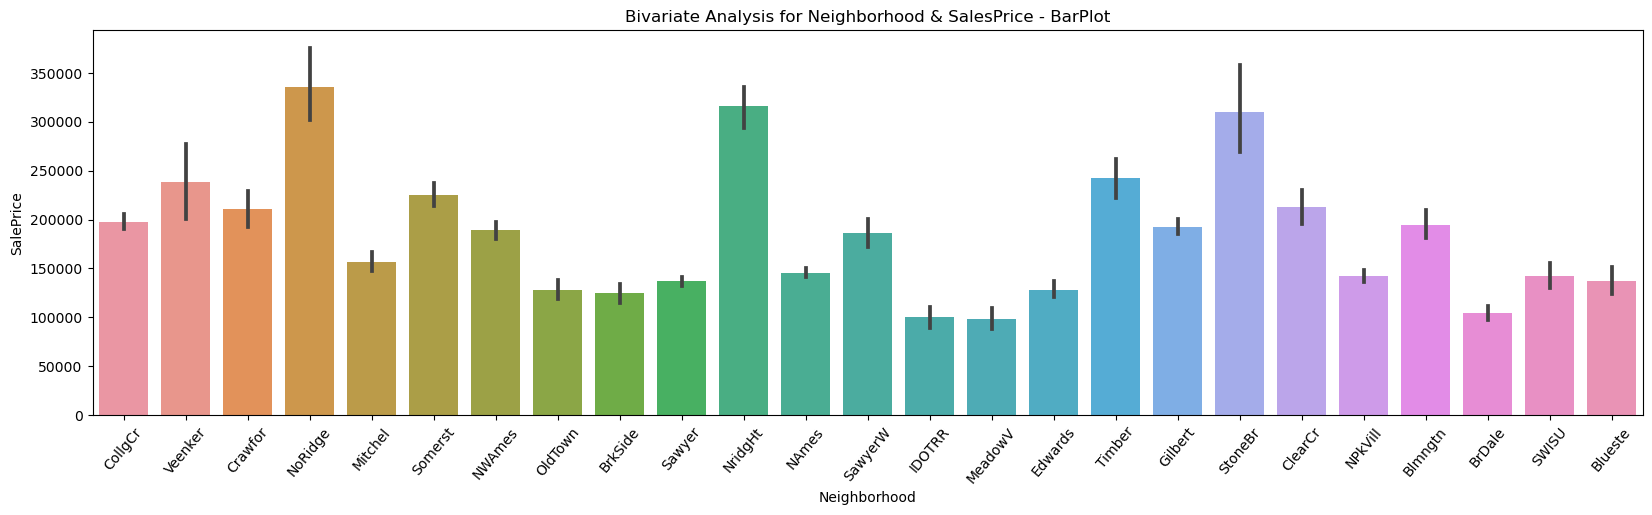

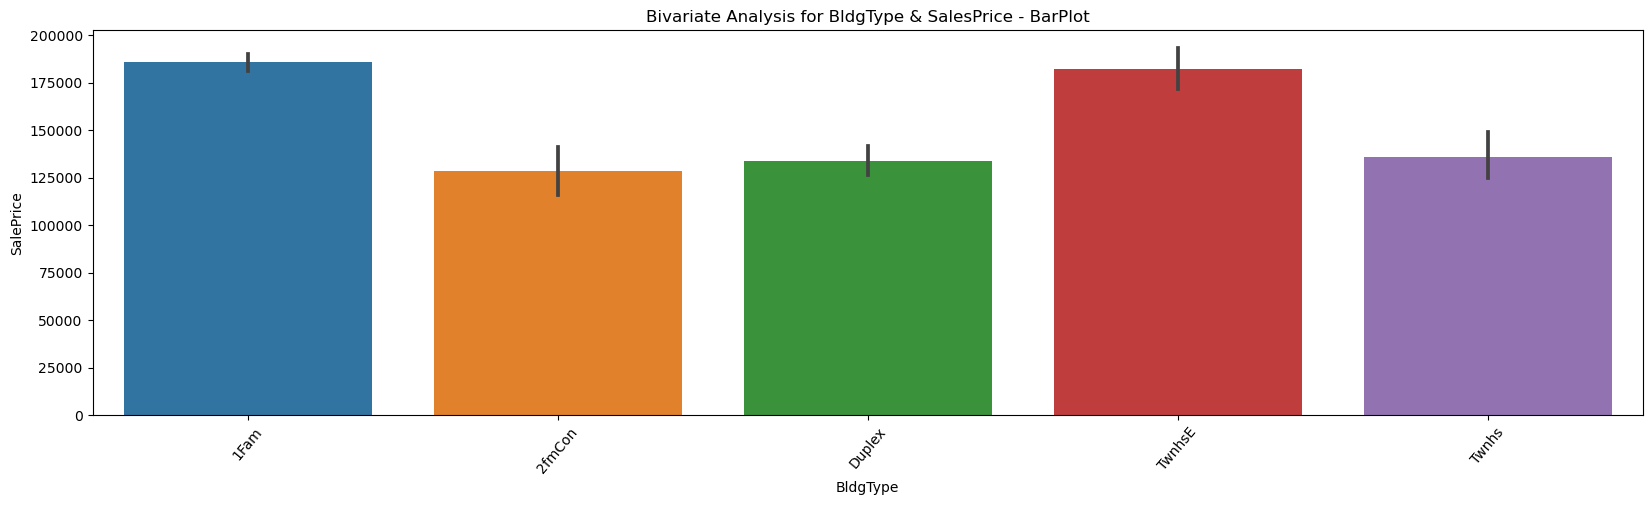

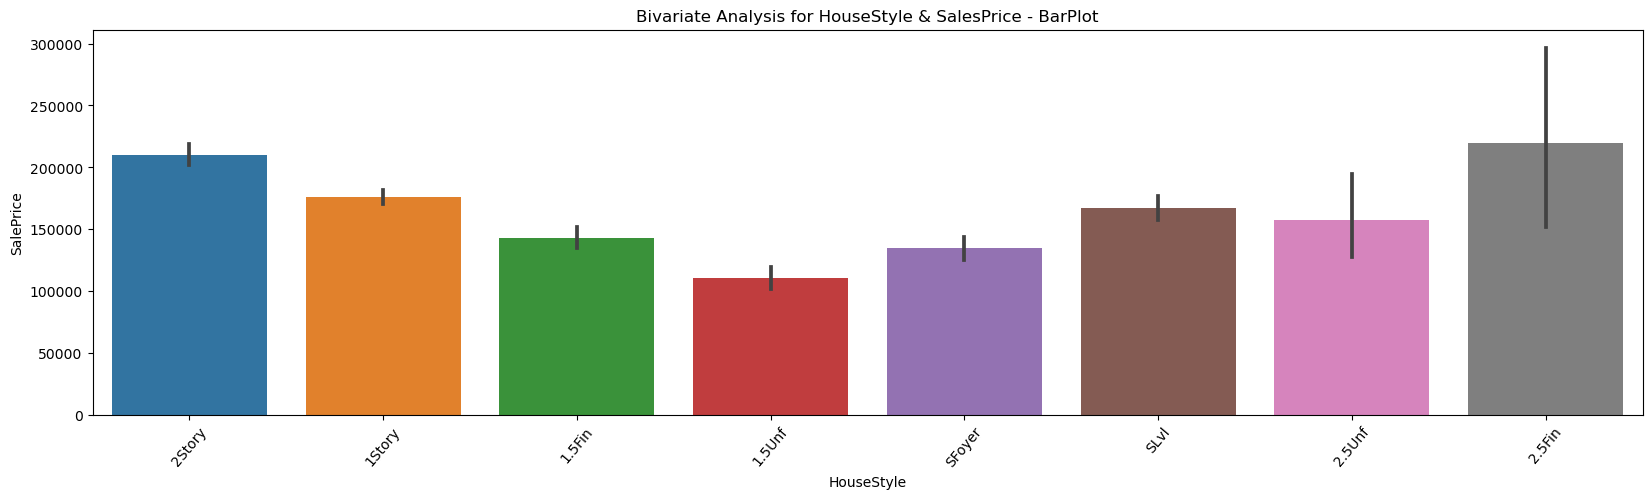

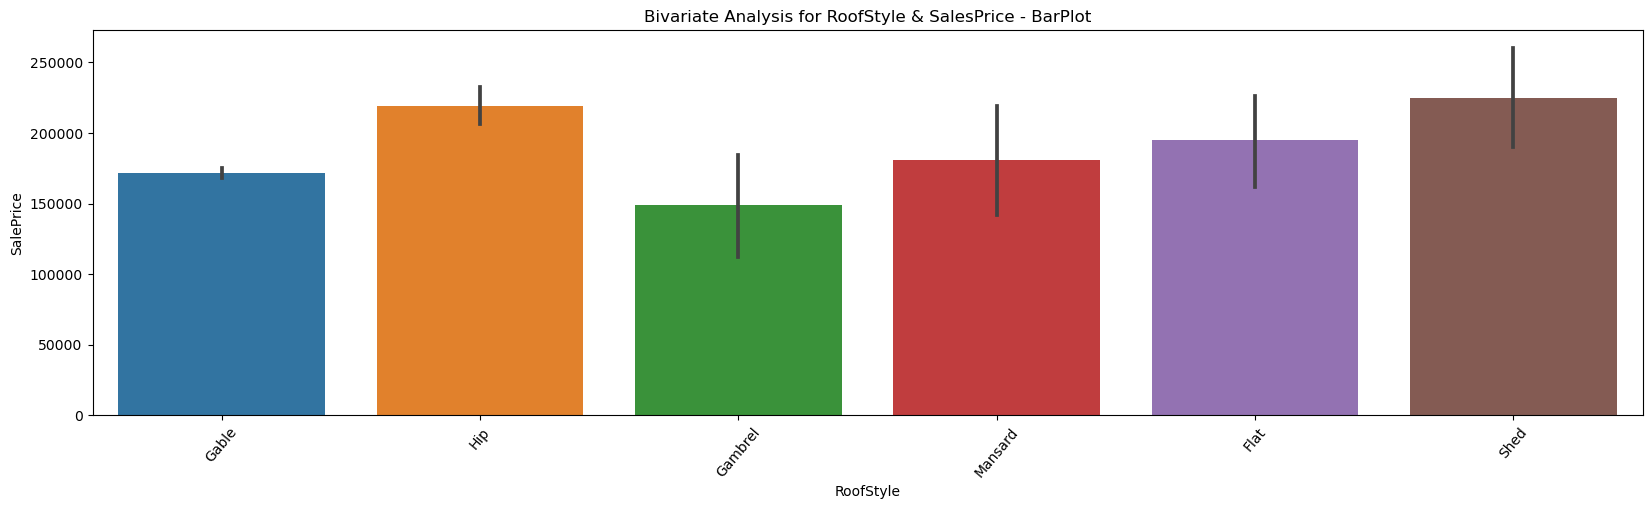

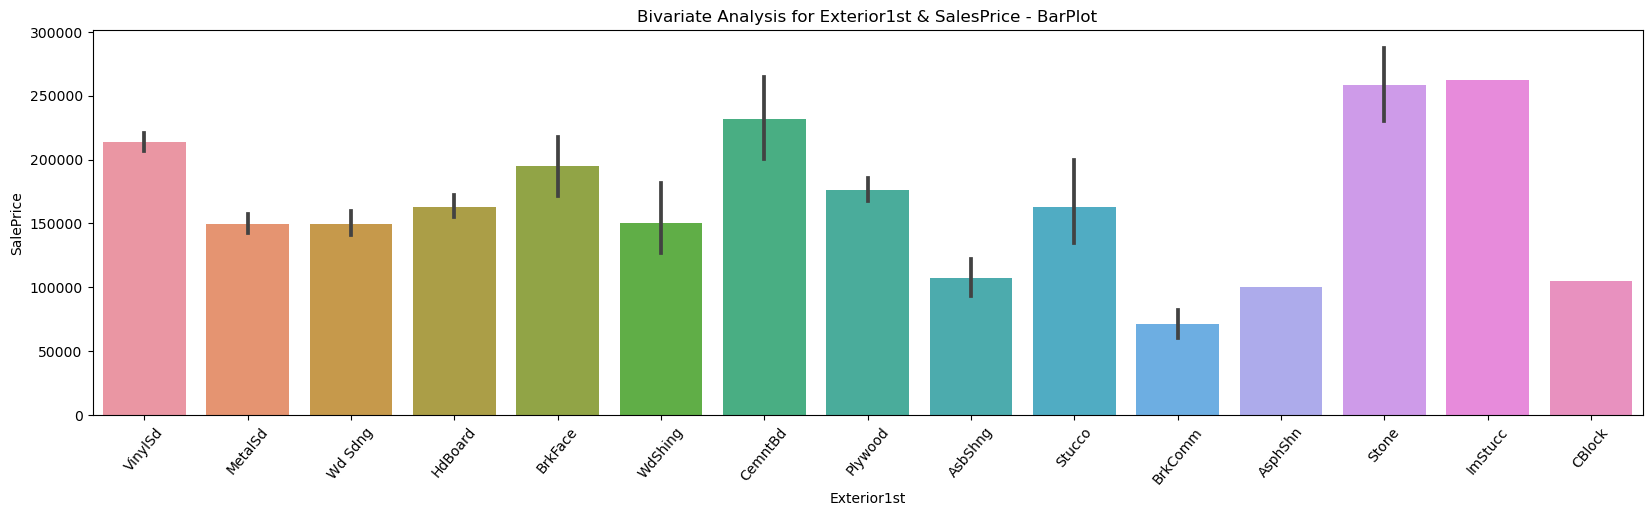

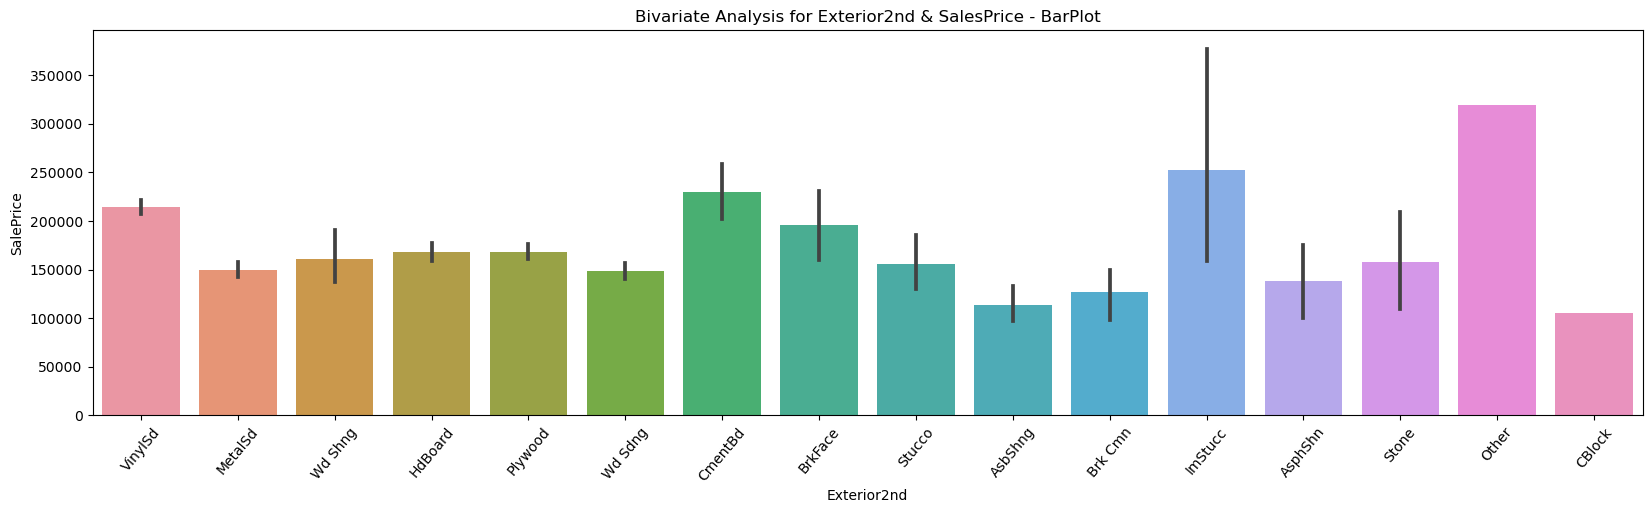

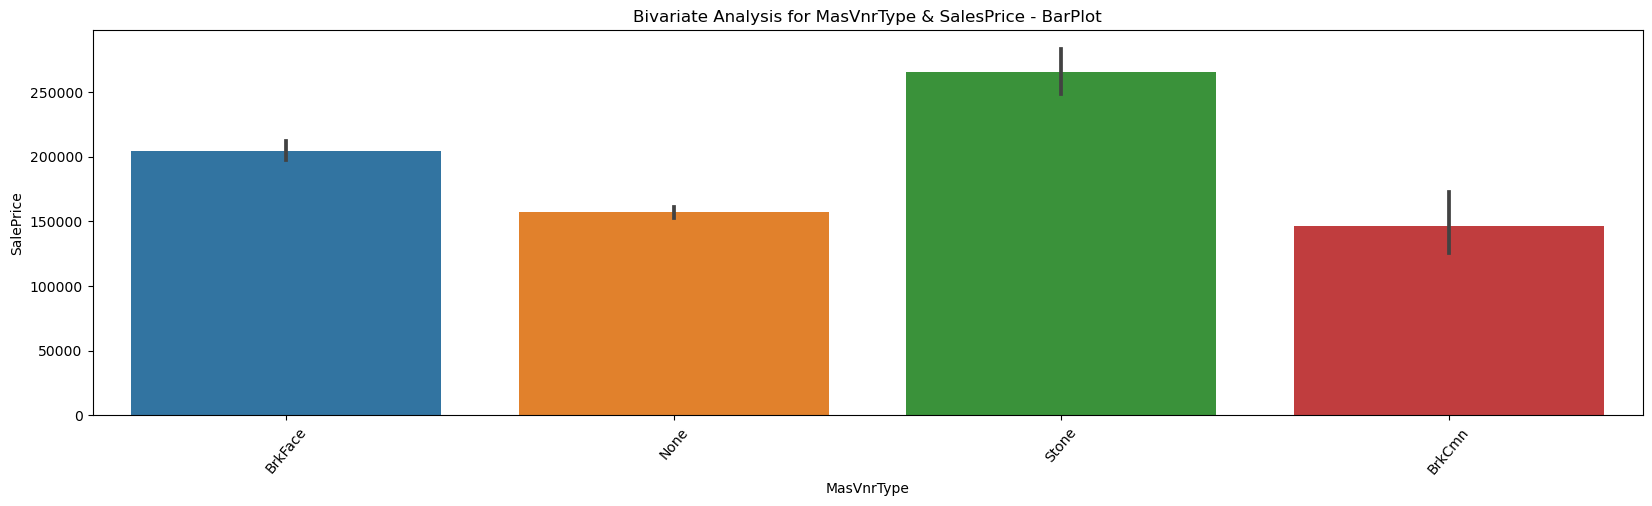

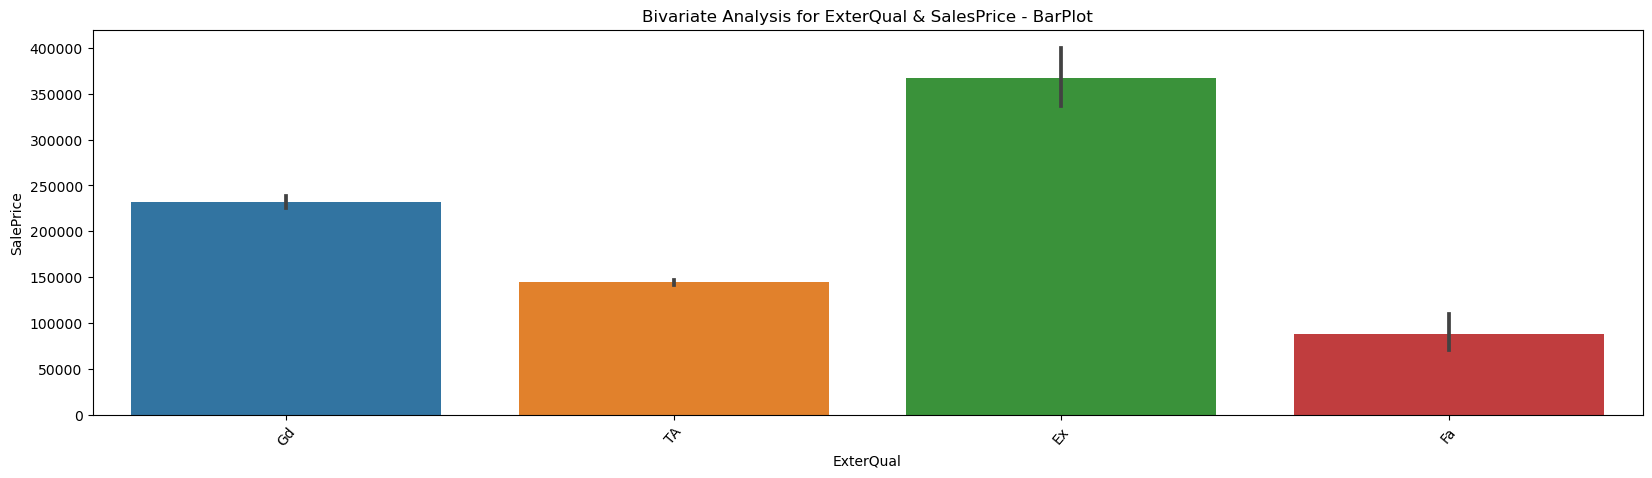

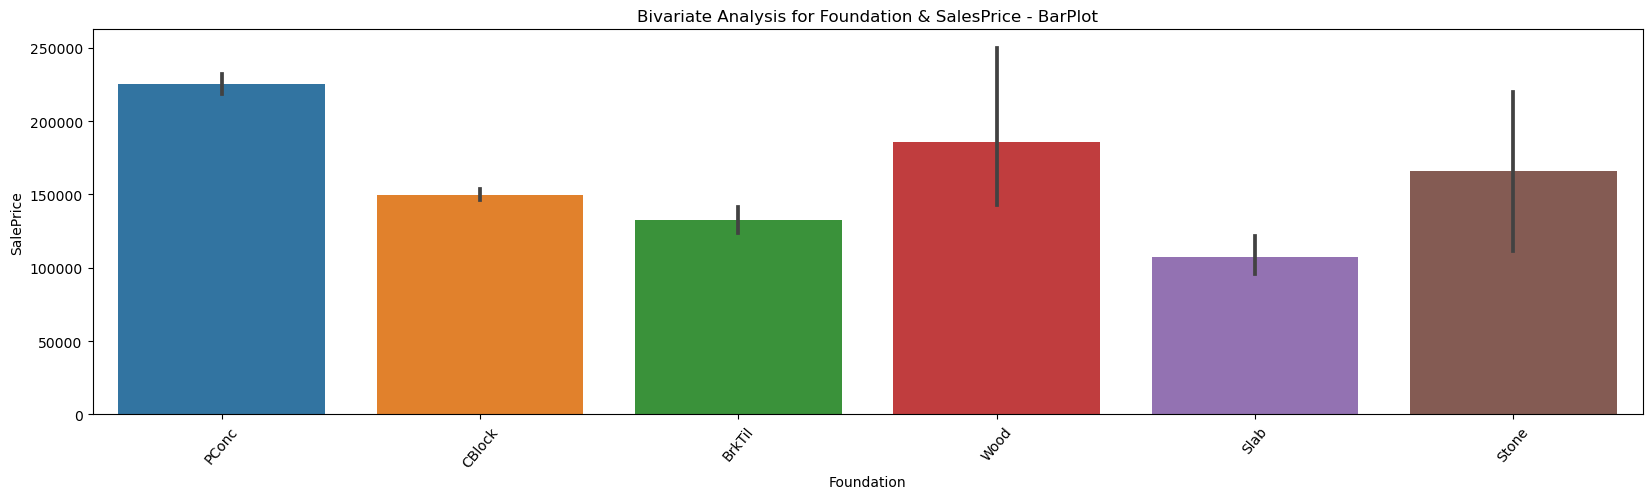

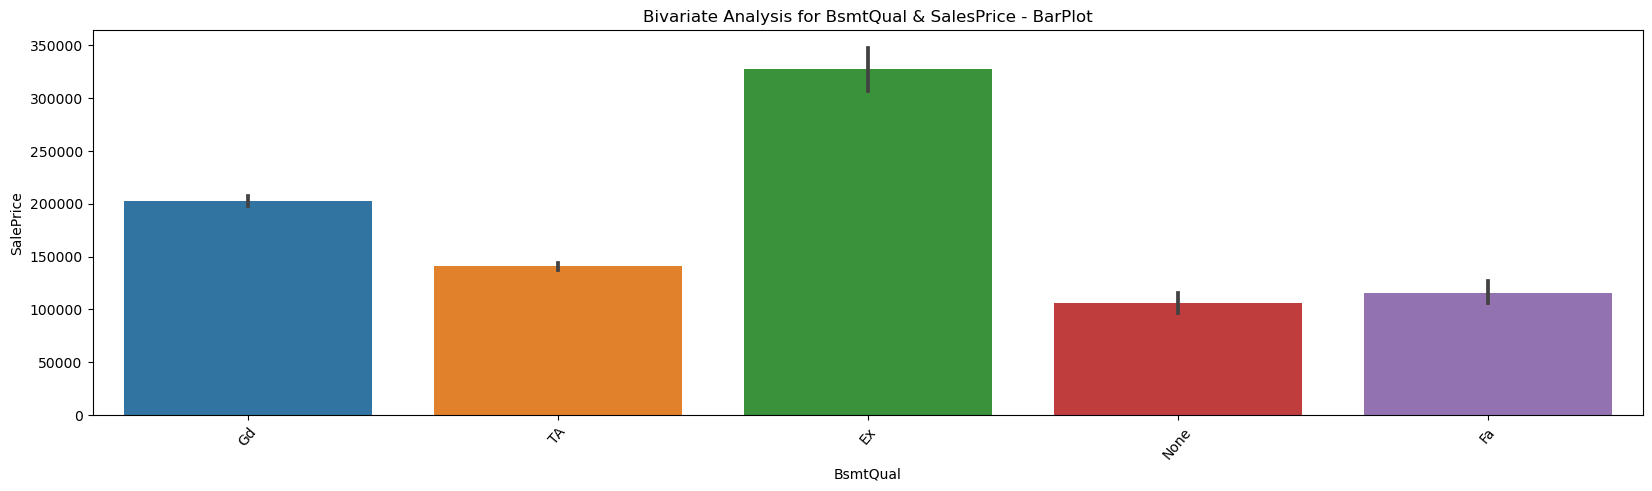

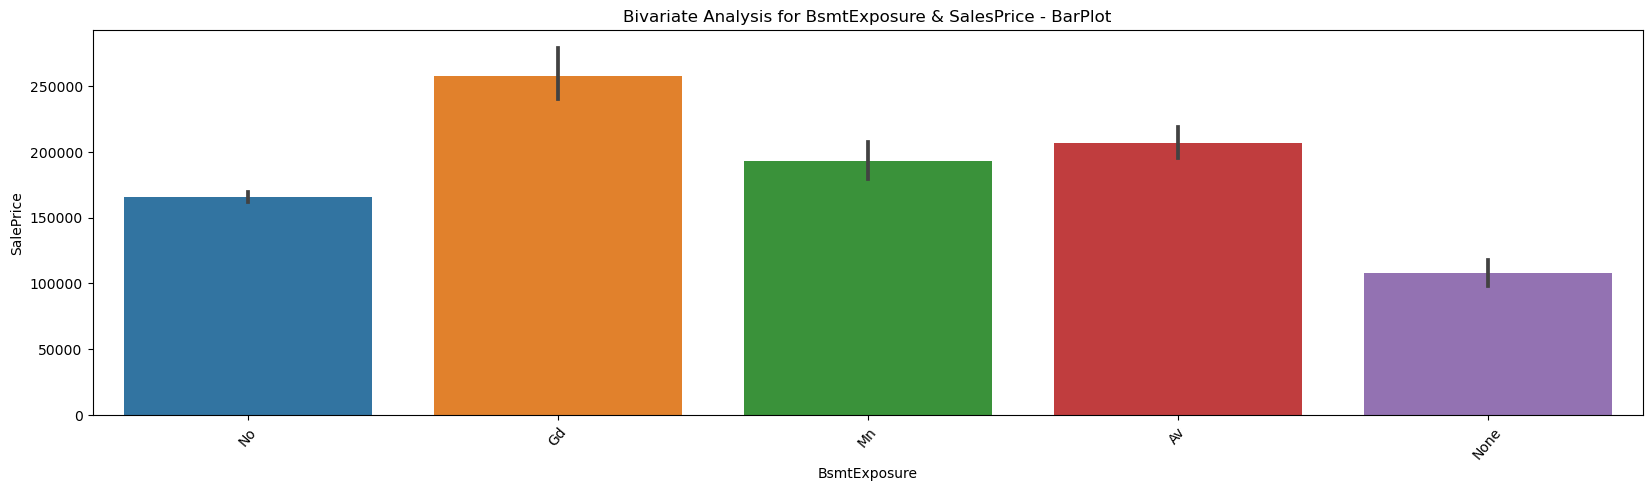

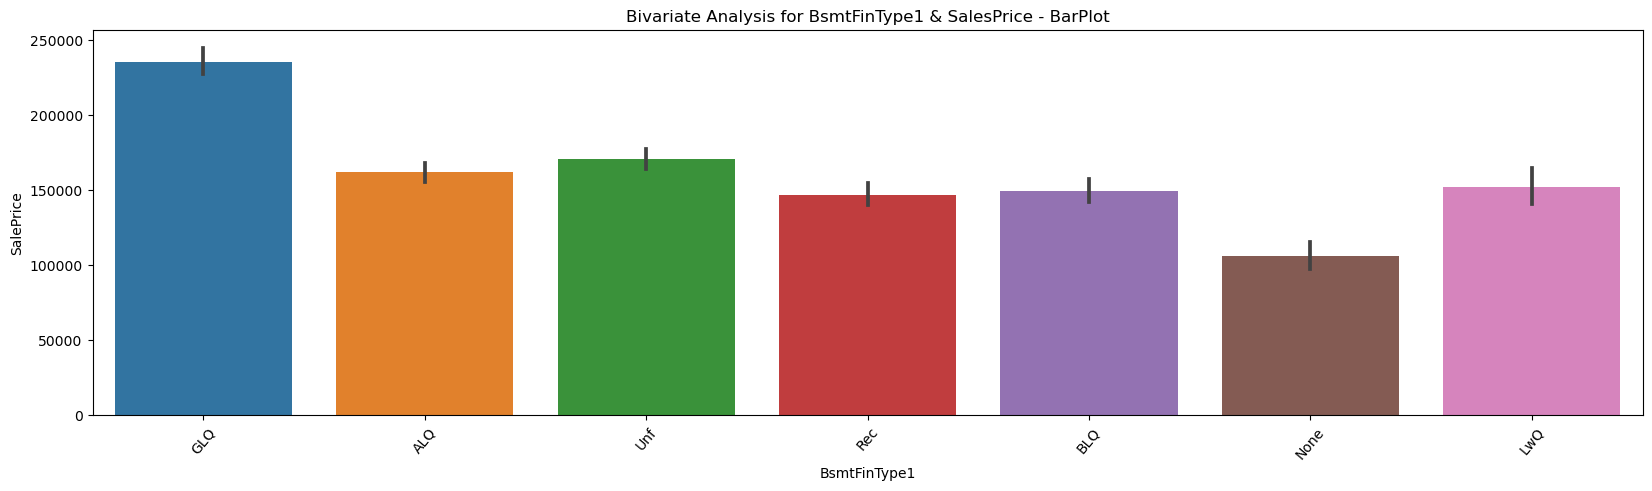

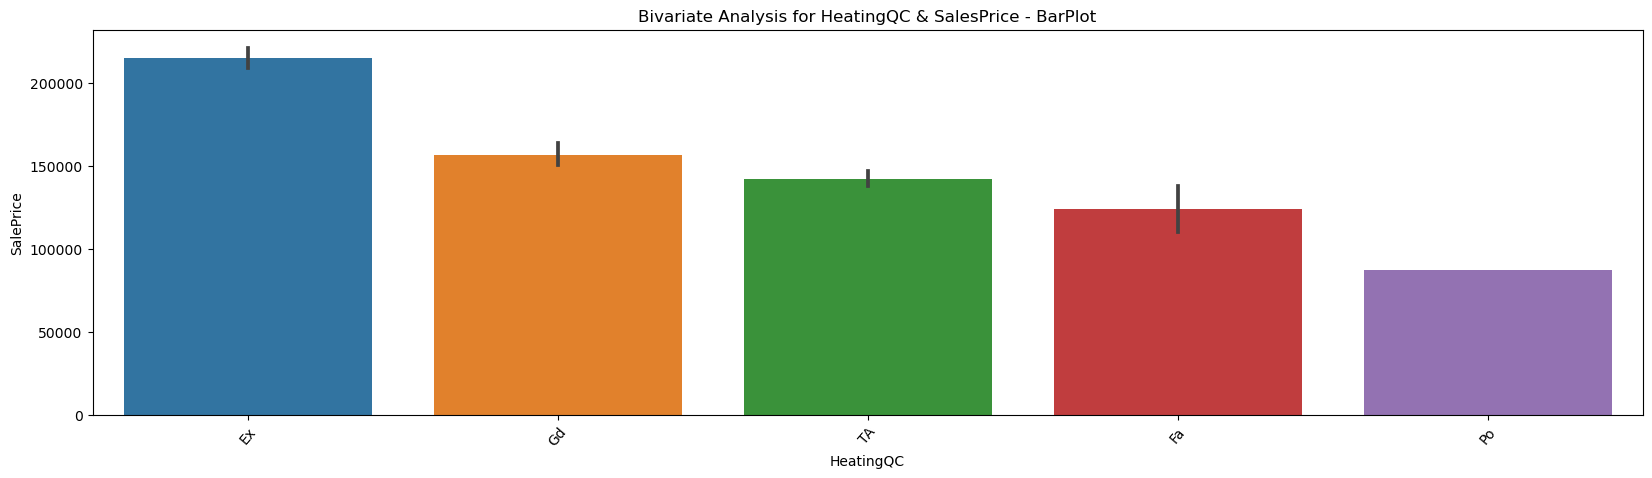

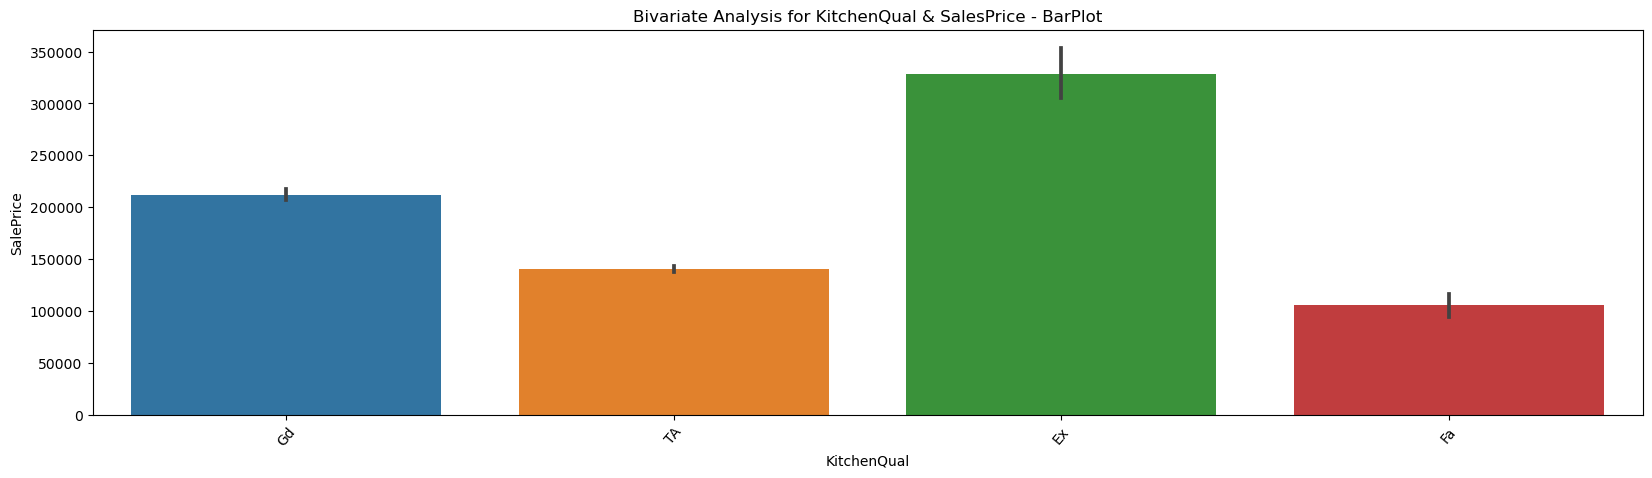

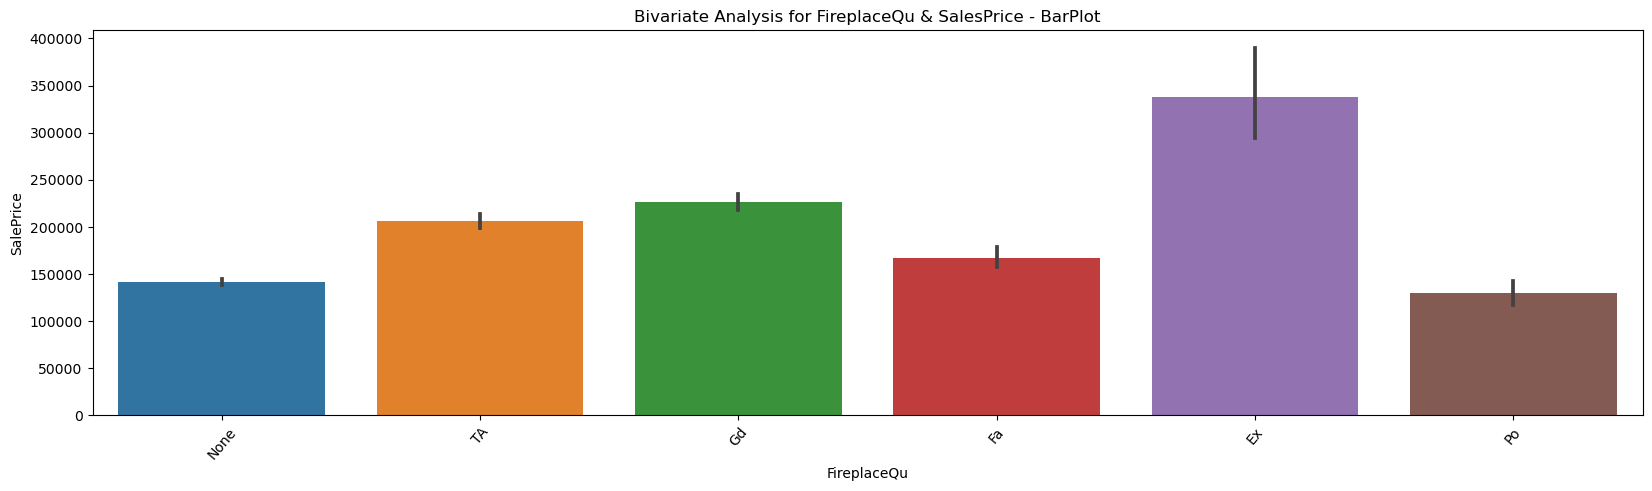

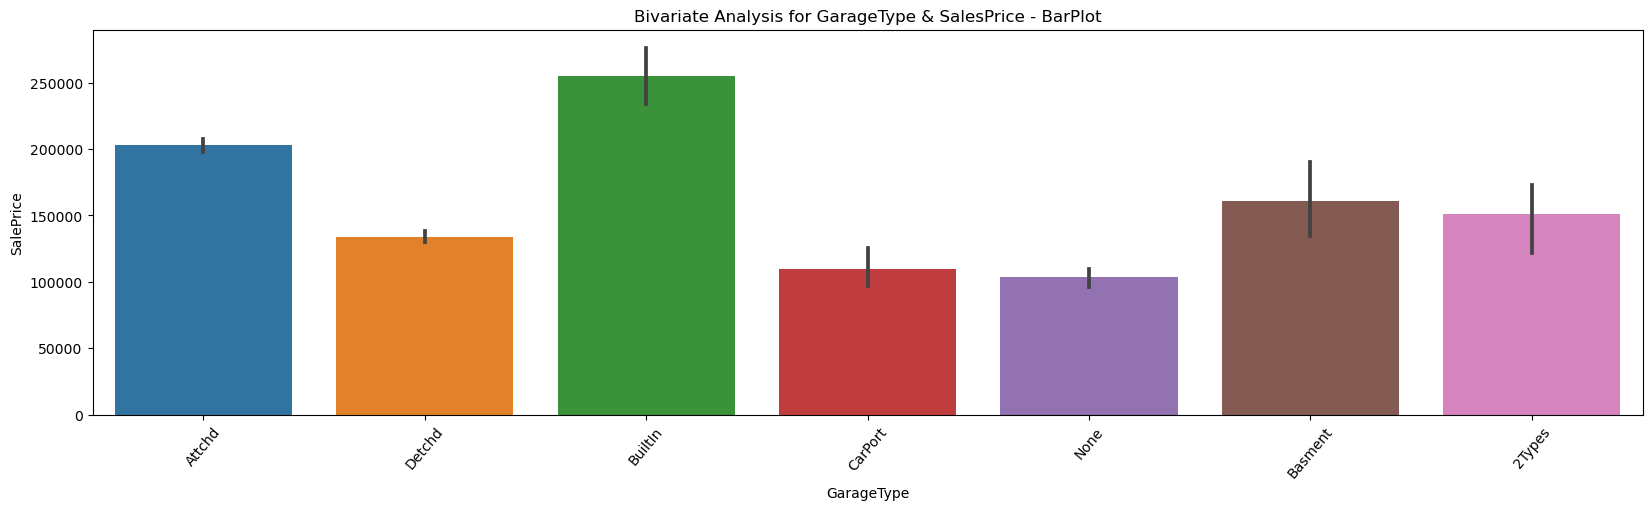

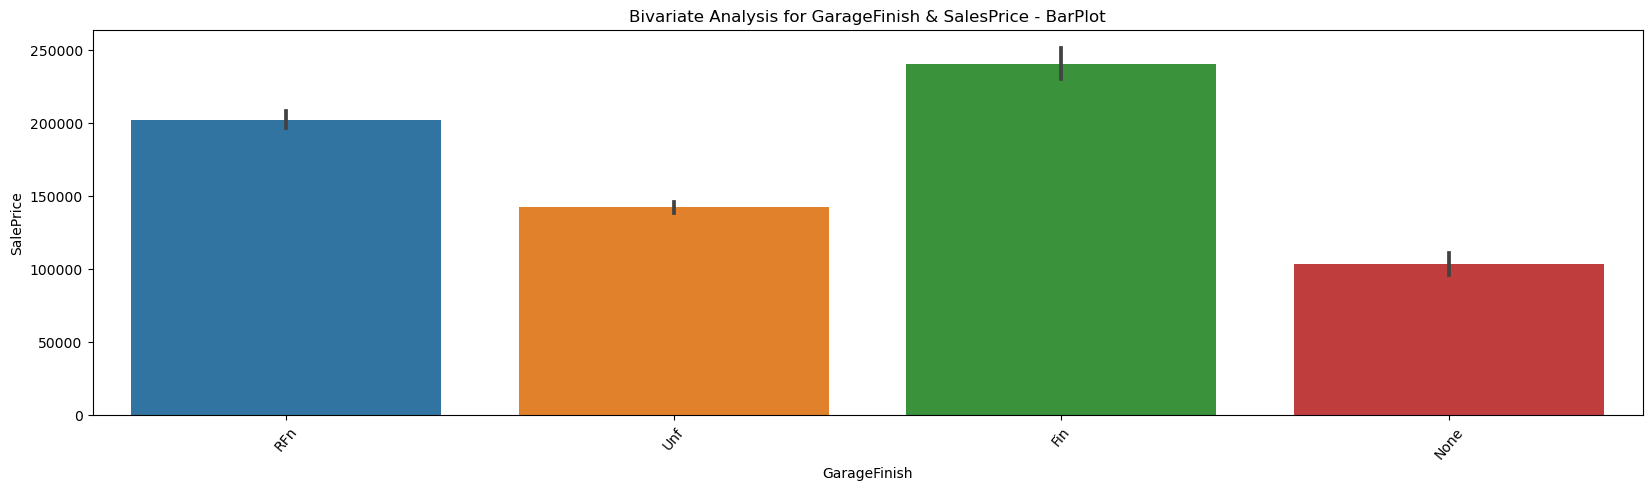

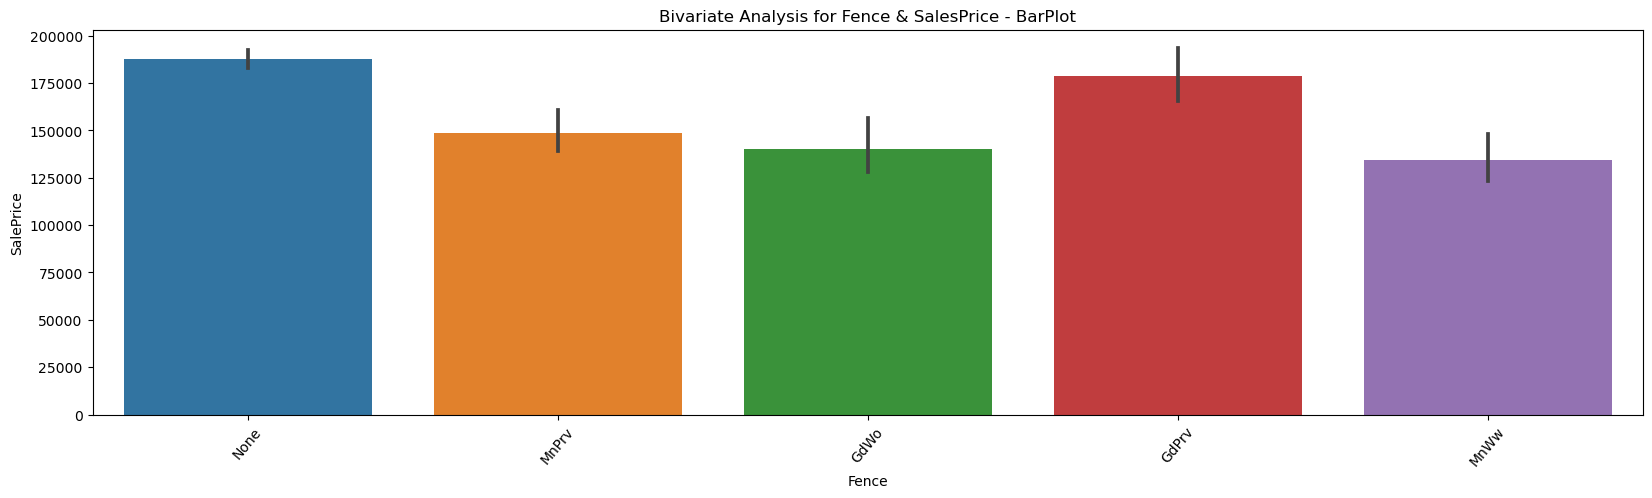

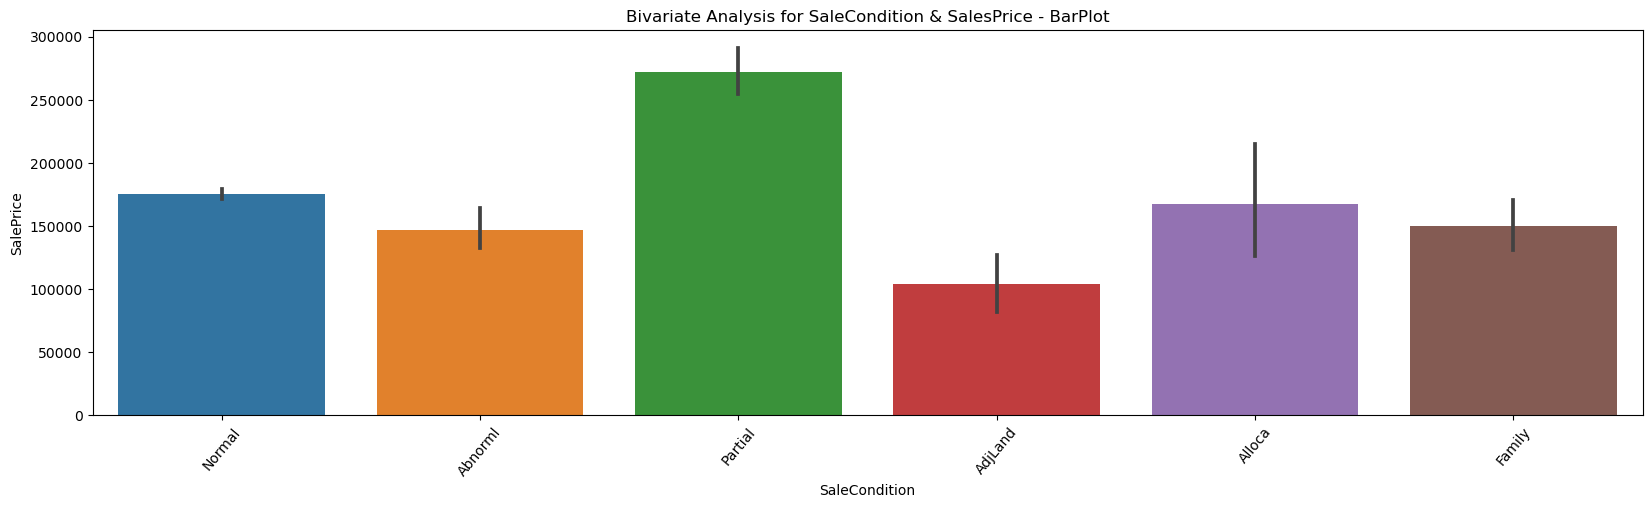

In [30]:
for var in cat_vars:
    plt.figure(figsize=(20,5))
    sns.barplot(data = df,x=var, y='SalePrice')
    plt.title(f"Bivariate Analysis for {var} & SalesPrice - BarPlot")
    plt.xticks(rotation=50)
    plt.show()

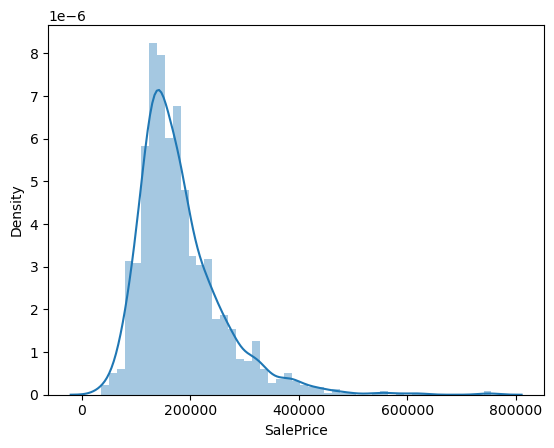

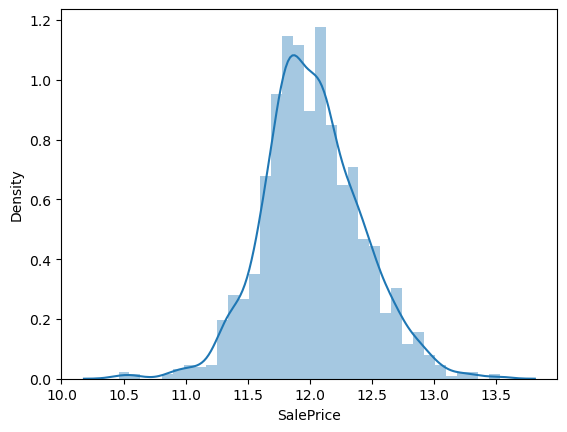

In [31]:
# SalePrice is Skewed towards left side so applying log to get normal distribution centered around zero
sns.distplot(df.SalePrice)
plt.show()

df.SalePrice = np.log(df.SalePrice)
sns.distplot(df.SalePrice)
plt.show()

### Sales Price is skewed to the left side so applying nplog to make the distribution symmetric.

### Inferences on Univartiate and Bivariate
-  Outliers can be detected in many features but its not advisable to drop records because of limited no of records present in dataset.
- Sales price for features which has order list category of Execellent/Good has higher sales
  -  ExterQual
  -  BsmtQual
  -  BsmtExposure
  -  HeatingQC
  -  KitchenQual
  -  FireplaceQu

###  MultiColinearity Test for Numerical Variables

In [32]:
df[num_vars].columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'IsRemodelled', 'BuiltOrRemodelAge'],
      dtype='object')

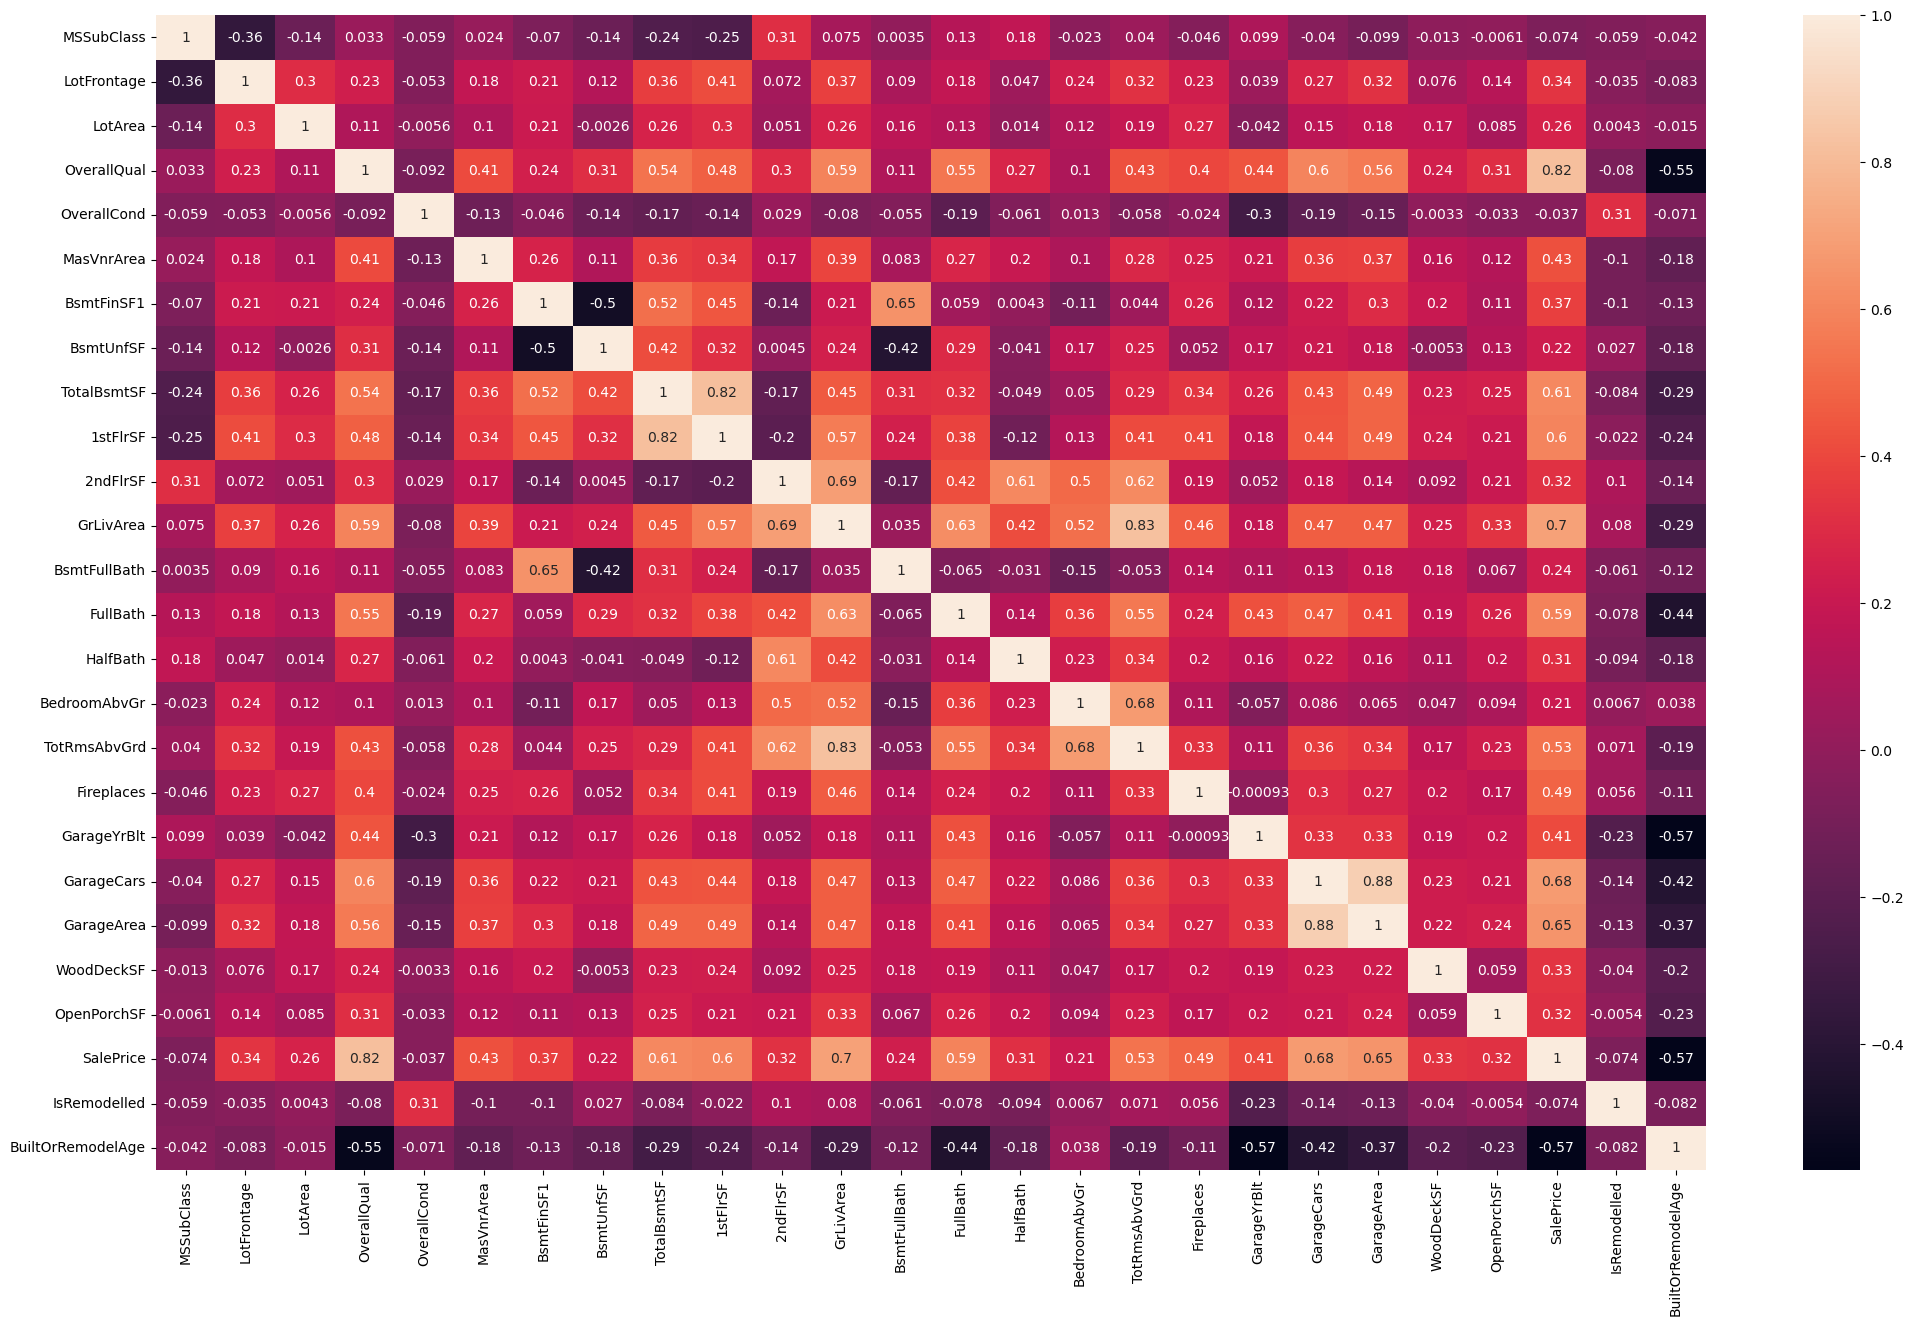

In [33]:
plt.figure(figsize=(25,15))
sns.heatmap(data=df[num_vars].corr(), annot=True)
plt.show()

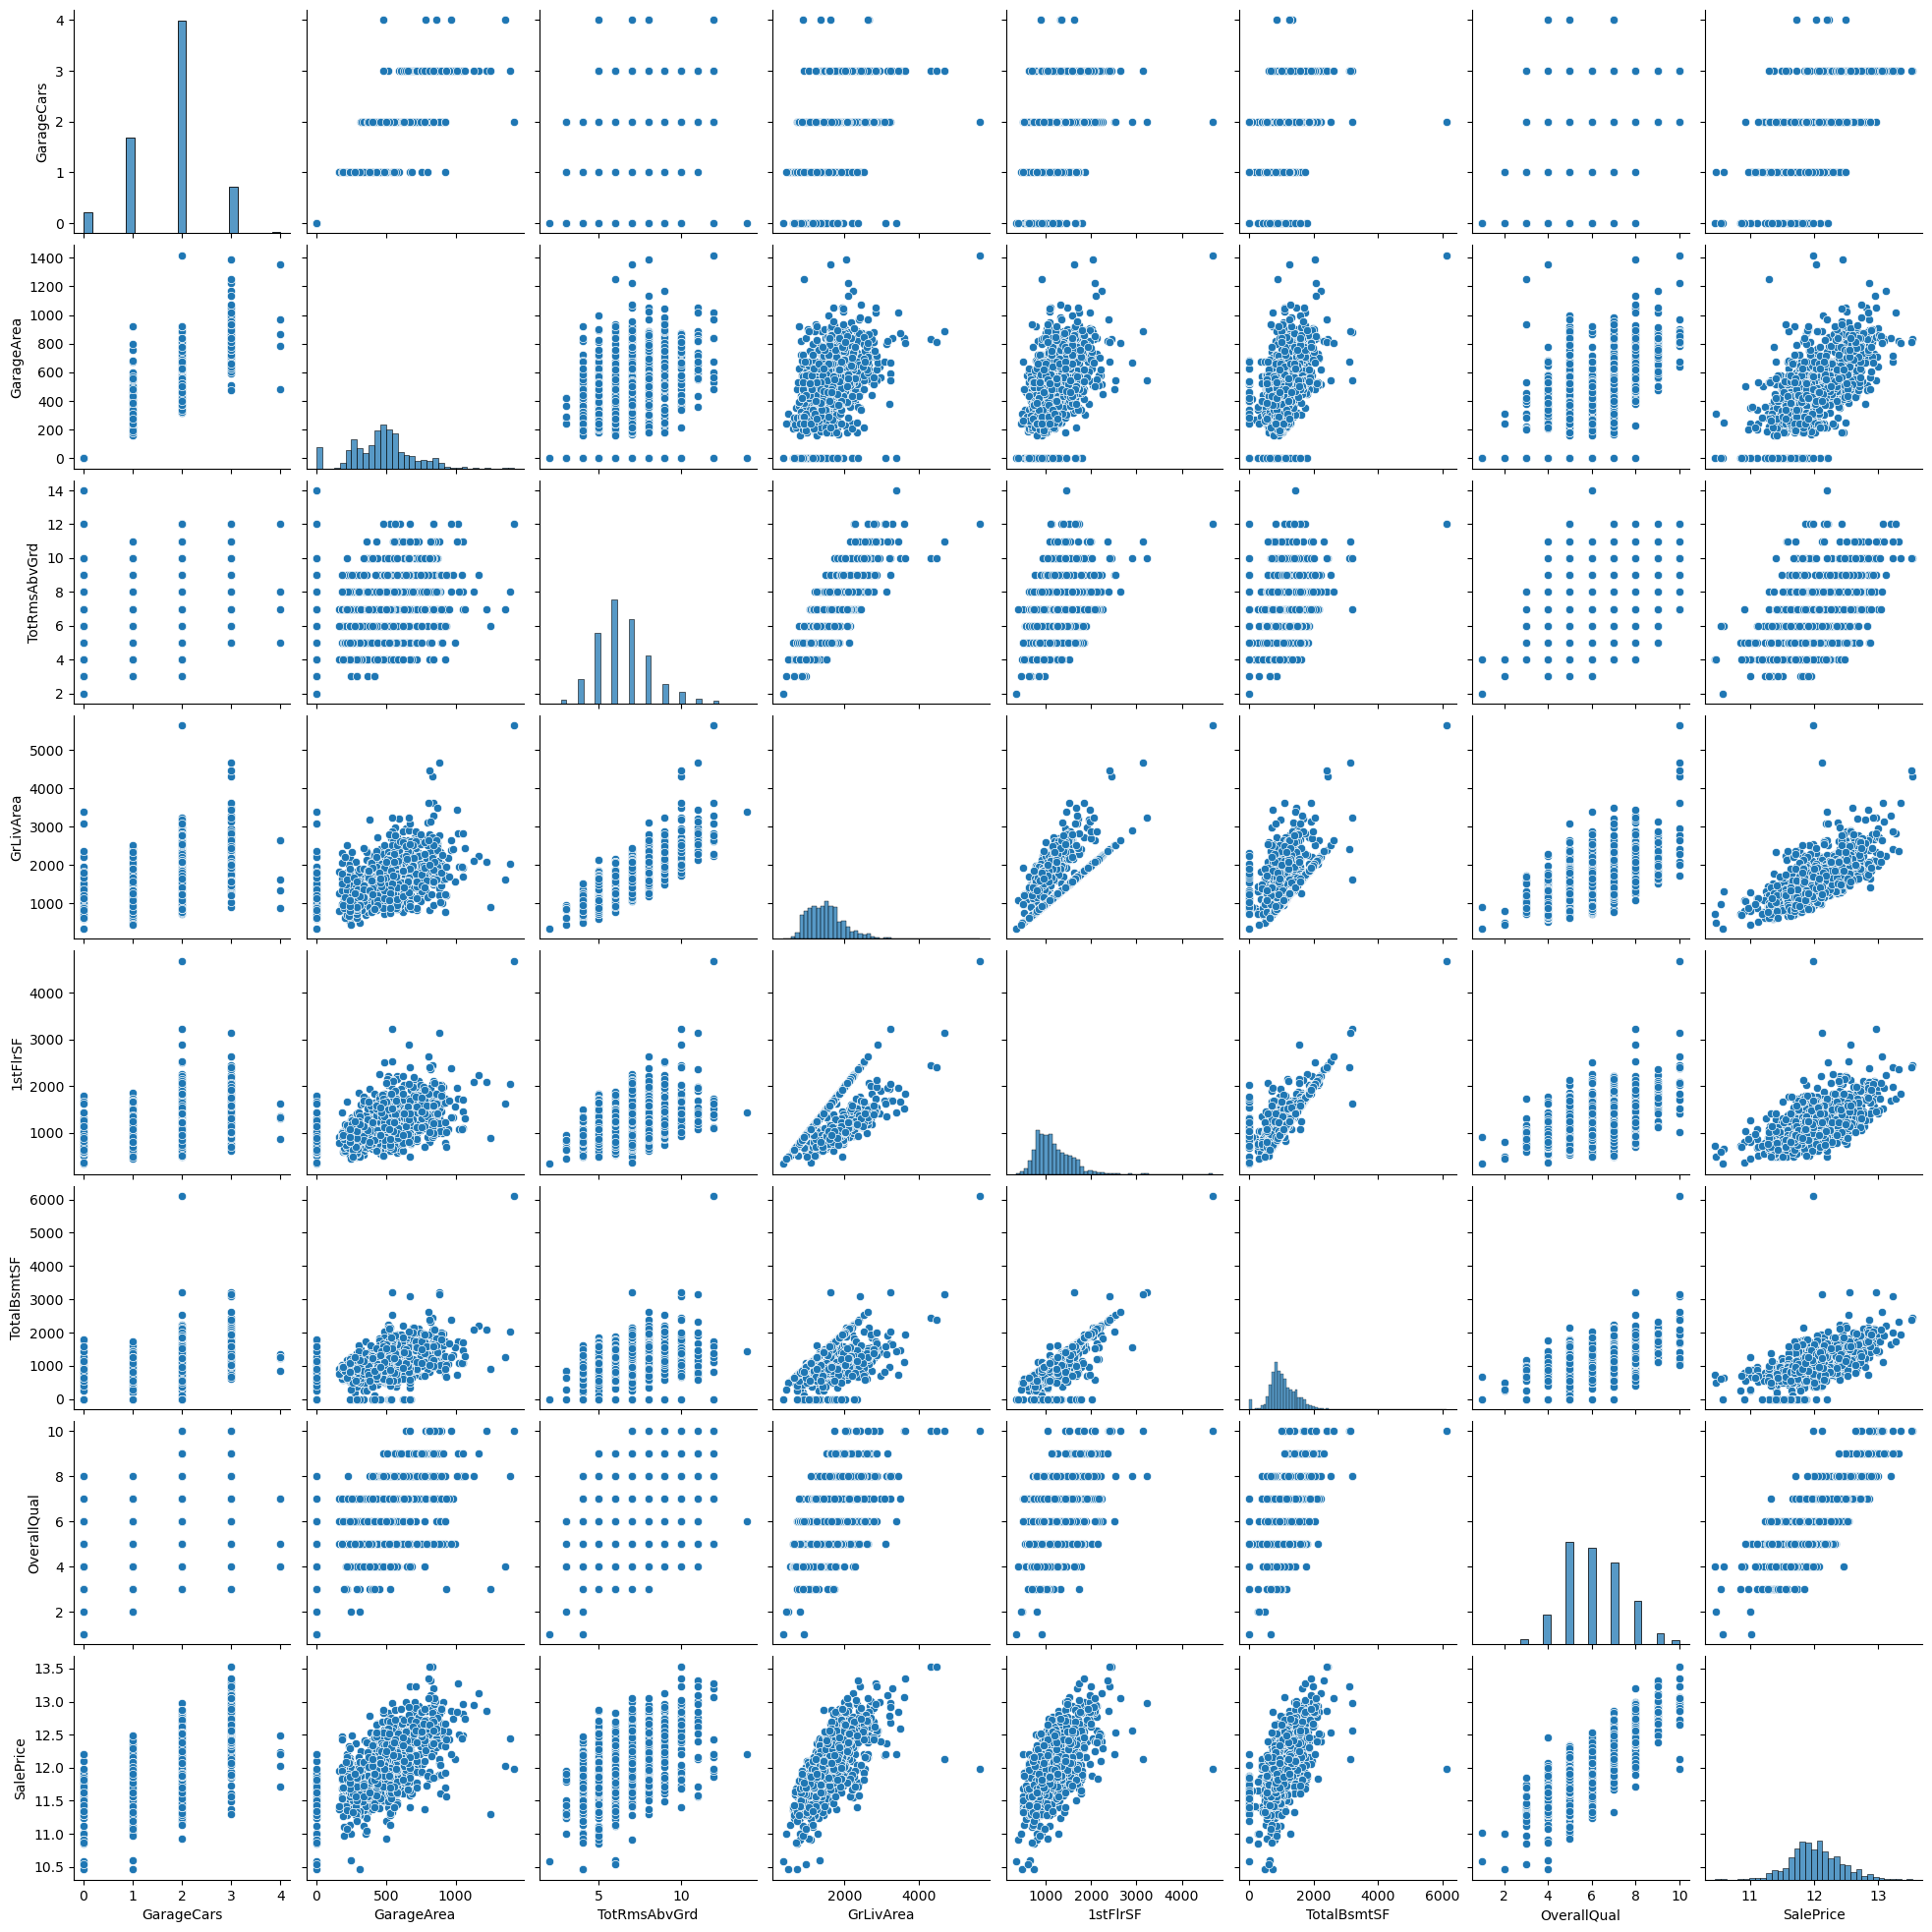

In [34]:
sns.pairplot(df[['GarageCars', 'GarageArea', 'TotRmsAbvGrd', 'GrLivArea','1stFlrSF', 'TotalBsmtSF','OverallQual','SalePrice']])
plt.show()

##### Removing Columns GarageCars and TotRmsAbvGrd and TotalBsmtSF
-  GarageCars and GarageArea shows 88% multicolinearity
-  TotRmsAbvGrd and GrLivAera shows 83% multicolinearity
-  1stFlrSf and TotalBsmtSF shows 82% multicolinearity

In [35]:
df.drop(['GarageCars'], axis = 1, inplace=True)
df.drop(['TotRmsAbvGrd'], axis = 1, inplace=True)
df.drop(['TotalBsmtSF'], axis = 1, inplace=True)

In [36]:
df.shape

(1460, 45)

### Step 4 : Data Transformation
- Converting Categorical data to numeric
- Creating dummies

In [37]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60       RL         65.0     8450      Reg    Inside      CollgCr   
1          20       RL         80.0     9600      Reg       FR2      Veenker   
2          60       RL         68.0    11250      IR1    Inside      CollgCr   
3          70       RL         60.0     9550      IR1    Corner      Crawfor   
4          60       RL         84.0    14260      IR1       FR2      NoRidge   

  BldgType HouseStyle  OverallQual  OverallCond RoofStyle Exterior1st  \
0     1Fam     2Story            7            5     Gable     VinylSd   
1     1Fam     1Story            6            8     Gable     MetalSd   
2     1Fam     2Story            7            5     Gable     VinylSd   
3     1Fam     2Story            7            5     Gable     Wd Sdng   
4     1Fam     2Story            8            5     Gable     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd      PConc       Gd   
1     MetalSd       None         0.0        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd      PConc       Gd   
3     Wd Shng       None         0.0        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd      PConc       Gd   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF HeatingQC  1stFlrSF  \
0           No          GLQ         706        150        Ex       856   
1           Gd          ALQ         978        284        Ex      1262   
2           Mn          GLQ         486        434        Ex       920   
3           No          ALQ         216        540        Gd       961   
4           Av          GLQ         655        490        Ex      1145   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
1         0       1262             0         2         0             3   
2       866       1786             1         2         1             3   
3       756       1717             1         1         0             3   
4      1053       2198             1         2         1             4   

  KitchenQual  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0          Gd           0        None     Attchd       2003.0          RFn   
1          TA           1          TA     Attchd       1976.0          RFn   
2          Gd           1          TA     Attchd       2001.0          RFn   
3          Gd           1          Gd     Detchd       1998.0          Unf   
4          Gd           1          TA     Attchd       2000.0          RFn   

   GarageArea  WoodDeckSF  OpenPorchSF Fence SaleCondition  SalePrice  \
0         548           0           61  None        Normal  12.247694   
1         460         298            0  None        Normal  12.109011   
2         608           0           42  None        Normal  12.317167   
3         642           0           35  None       Abnorml  11.849398   
4         836         192           84  None        Normal  12.429216   

   IsRemodelled  BuiltOrRemodelAge  
0             0                  5  
1             0                 31  
2             1                  6  
3             1                 36  
4             0                  8

In [38]:
df.nunique().sort_values(ascending=False)

LotArea              1073
GrLivArea             861
BsmtUnfSF             780
1stFlrSF              753
SalePrice             663
BsmtFinSF1            637
GarageArea            441
2ndFlrSF              417
MasVnrArea            327
WoodDeckSF            274
OpenPorchSF           202
LotFrontage           110
GarageYrBlt            97
BuiltOrRemodelAge      62
Neighborhood           25
Exterior2nd            16
MSSubClass             15
Exterior1st            15
OverallQual            10
OverallCond             9
BedroomAbvGr            8
HouseStyle              8
BsmtFinType1            7
GarageType              7
RoofStyle               6
SaleCondition           6
Foundation              6
FireplaceQu             6
BsmtExposure            5
MSZoning                5
HeatingQC               5
BldgType                5
BsmtQual                5
Fence                   5
LotConfig               5
LotShape                4
MasVnrType              4
GarageFinish            4
Fireplaces  

#### Label Encoding for Ordinal Data.

In [39]:
# Converting those feature in which the values are of order list

df['LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0})
df['GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df['HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['Fence'] = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df['LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })


#### Creating Dummies

In [40]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  LotConfig  \
0          60       RL         65.0     8450         3          5   
1          20       RL         80.0     9600         3          2   
2          60       RL         68.0    11250         2          5   
3          70       RL         60.0     9550         2          4   
4          60       RL         84.0    14260         2          2   

  Neighborhood  BldgType  HouseStyle  OverallQual  OverallCond RoofStyle  \
0      CollgCr         1           4            7            5     Gable   
1      Veenker         1           1            6            8     Gable   
2      CollgCr         1           4            7            5     Gable   
3      Crawfor         1           4            7            5     Gable   
4      NoRidge         1           4            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ExterQual Foundation  \
0     VinylSd     VinylSd    BrkFace       196.0          4      PConc   
1     MetalSd     MetalSd       None         0.0          3     CBlock   
2     VinylSd     VinylSd    BrkFace       162.0          4      PConc   
3     Wd Sdng     Wd Shng       None         0.0          3     BrkTil   
4     VinylSd     VinylSd    BrkFace       350.0          4      PConc   

   BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  HeatingQC  \
0         4             1             6         706        150          5   
1         4             4             5         978        284          5   
2         4             2             6         486        434          5   
3         3             1             5         216        540          4   
4         4             3             6         655        490          5   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   BedroomAbvGr  KitchenQual  Fireplaces  FireplaceQu GarageType  GarageYrBlt  \
0             3            4           0            0     Attchd       2003.0   
1             3            3           1            3     Attchd       1976.0   
2             3            4           1            3     Attchd       2001.0   
3             3            4           1            4     Detchd       1998.0   
4             4            4           1            3     Attchd       2000.0   

   GarageFinish  GarageArea  WoodDeckSF  OpenPorchSF  Fence SaleCondition  \
0             2         548           0           61      0        Normal   
1             2         460         298            0      0        Normal   
2             2         608           0           42      0        Normal   
3             1         642           0           35      0       Abnorml   
4             2         836         192           84      0        Normal   

   SalePrice  IsRemodelled  BuiltOrRemodelAge  
0  12.247694             0                  5  
1  12.109011             0                 31  
2  12.317167             1                  6  
3  11.849398             1                 36  
4  12.429216             0                  8

In [41]:
df.isna().sum()

MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
LotShape             0
LotConfig            0
Neighborhood         0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
RoofStyle            0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
MasVnrArea           0
ExterQual            0
Foundation           0
BsmtQual             0
BsmtExposure         0
BsmtFinType1         0
BsmtFinSF1           0
BsmtUnfSF            0
HeatingQC            0
1stFlrSF             0
2ndFlrSF             0
GrLivArea            0
BsmtFullBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenQual          0
Fireplaces           0
FireplaceQu          0
GarageType           0
GarageYrBlt          0
GarageFinish         0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
Fence                0
SaleCondition        0
SalePrice            0
IsRemodelle

In [42]:
# Creating dummies for categorical data
df = pd.get_dummies(data=df , drop_first=True, dtype=int)

In [43]:
df.head()

MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  BldgType  \
0          60         65.0     8450         3          5         1   
1          20         80.0     9600         3          2         1   
2          60         68.0    11250         2          5         1   
3          70         60.0     9550         2          4         1   
4          60         84.0    14260         2          2         1   

   HouseStyle  OverallQual  OverallCond  MasVnrArea  ExterQual  BsmtQual  \
0           4            7            5       196.0          4         4   
1           1            6            8         0.0          3         4   
2           4            7            5       162.0          4         4   
3           4            7            5         0.0          3         3   
4           4            8            5       350.0          4         4   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  HeatingQC  1stFlrSF  \
0             1             6         706        150          5       856   
1             4             5         978        284          5      1262   
2             2             6         486        434          5       920   
3             1             5         216        540          4       961   
4             3             6         655        490          5      1145   

   2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0       854       1710             1         2         1             3   
1         0       1262             0         2         0             3   
2       866       1786             1         2         1             3   
3       756       1717             1         1         0             3   
4      1053       2198             1         2         1             4   

   KitchenQual  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  \
0            4           0            0       2003.0             2   
1            3           1            3       1976.0             2   
2            4           1            3       2001.0             2   
3            4           1            4       1998.0             1   
4            4           1            3       2000.0             2   

   GarageArea  WoodDeckSF  OpenPorchSF  Fence  SalePrice  IsRemodelled  \
0         548           0           61      0  12.247694             0   
1         460         298            0      0  12.109011             0   
2         608           0           42      0  12.317167             1   
3         642           0           35      0  11.849398             1   
4         836         192           84      0  12.429216             0   

   BuiltOrRemodelAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                  5            0            0            1            0   
1                 31            0            0            1            0   
2                  6            0            0            1            0   
3                 36            0            0            1            0   
4                  8            0            0            1            0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert 

In [44]:
df.shape

(1460, 117)

### Step 5 : Train Test Split

In [45]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [46]:
df_train.shape

(1021, 117)

In [47]:
df_test.shape

(438, 117)

In [48]:
df_train.nunique()

MSSubClass                15
LotFrontage              105
LotArea                  795
LotShape                   4
LotConfig                  5
BldgType                   5
HouseStyle                 8
OverallQual               10
OverallCond                9
MasVnrArea               269
ExterQual                  4
BsmtQual                   5
BsmtExposure               5
BsmtFinType1               7
BsmtFinSF1               492
BsmtUnfSF                612
HeatingQC                  5
1stFlrSF                 611
2ndFlrSF                 313
GrLivArea                660
BsmtFullBath               4
FullBath                   4
HalfBath                   3
BedroomAbvGr               8
KitchenQual                4
Fireplaces                 4
FireplaceQu                6
GarageYrBlt               95
GarageFinish               4
GarageArea               365
WoodDeckSF               225
OpenPorchSF              178
Fence                      5
SalePrice                529
IsRemodelled  

In [49]:
unique_df = pd.DataFrame({'Features' : df_train.nunique().index, 'NCount' : df_train.nunique().values})
scale_vars = list(unique_df[unique_df.NCount > 2].Features)

In [50]:
scale_vars

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LotConfig',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageFinish',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'Fence',
 'SalePrice',
 'BuiltOrRemodelAge']

#### Rescaling the features 

In [51]:
scaler = MinMaxScaler()
df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])
df_test[scale_vars] = scaler.transform(df_test[scale_vars])

In [52]:
df_train.describe()

MSSubClass  LotFrontage      LotArea     LotShape    LotConfig  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.226134     0.166249     0.042143     0.862227     0.894466   
std       0.254755     0.075615     0.048226     0.199011     0.191911   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.133562     0.027923     0.666667     0.750000   
50%       0.176471     0.164384     0.037531     1.000000     1.000000   
75%       0.294118     0.195205     0.046943     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          BldgType   HouseStyle  OverallQual  OverallCond   MasVnrArea  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.119980     0.238282     0.565676     0.572723     0.065306   
std       0.276183     0.279500     0.155529     0.136506     0.117088   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.444444     0.500000     0.000000   
50%       0.000000     0.142857     0.555556     0.500000     0.000000   
75%       0.000000     0.428571     0.666667     0.625000     0.098750   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         ExterQual     BsmtQual  BsmtExposure  BsmtFinType1   BsmtFinSF1  \
count  1021.000000  1021.000000   1021.000000   1021.000000  1021.000000   
mean      0.466210     0.695788      0.415034      0.598433     0.079337   
std       0.190389     0.180065      0.272636      0.352275     0.082377   
min       0.000000     0.000000      0.000000      0.000000     0.000000   
25%       0.333333     0.600000      0.250000      0.166667     0.000000   
50%       0.333333     0.800000      0.250000      0.666667     0.069454   
75%       0.666667     0.800000      0.750000      1.000000     0.126152   
max       1.000000     1.000000      1.000000      1.000000     1.000000   

         BsmtUnfSF    HeatingQC     1stFlrSF     2ndFlrSF    GrLivArea  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.241388     0.787218     0.184341     0.165943     0.207345   
std       0.192066     0.243717     0.092132     0.210799     0.102232   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.092466     0.500000     0.116435     0.000000     0.133743   
50%       0.197774     1.000000     0.165278     0.000000     0.197540   
75%       0.345034     1.000000     0.243056     0.352058     0.255573   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       BsmtFullBath     FullBath     HalfBath  BedroomAbvGr  KitchenQual  \
count   1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   
mean       0.146588     0.522037     0.188051      0.356881     0.503754   
std        0.175127     0.183997     0.250283      0.102552     0.219705   
min        0.000000     0.000000     0.000000      0.000000     0.000000   
25%        0.000000     0.333333     0.000000      0.250000     0.333333   
50%        0.000000     0.666667     0.000000      0.375000     0.333333   
75%        0.333333     0.666667     0.500000      0.375000     0.666667   
max        1.000000     1.000000     1.000000      1.000000     1.000000   

        Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish   GarageArea  \
count  1021.000000  1021.000000  1021.000000   1021.000000  1021.000000   
mean      0.199151     0.359060     0.729623      0.570356     0.332545   
std       0.215306     0.365267     0.224554      0.299921     0.150018   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.572727      0.333333     0.231312   
50%       0.333333     0.400000     0.772727      0.666667     0.338505   
75%       0.333333     0.800000     0.936364      0.666667     0.406206   
max       1.000000     1.000000     1

In [53]:
df_test.describe()

MSSubClass  LotFrontage     LotArea    LotShape   LotConfig  \
count  438.000000   438.000000  438.000000  438.000000  438.000000   
mean     0.195810     0.169716    0.042633    0.868341    0.900114   
std      0.233634     0.075051    0.043013    0.182274    0.196173   
min      0.000000     0.000000   -0.000828    0.000000    0.000000   
25%      0.000000     0.133562    0.029354    0.666667    0.750000   
50%      0.176471     0.164384    0.037005    1.000000    1.000000   
75%      0.235294     0.202055    0.047823    1.000000    1.000000   
max      1.000000     1.000000    0.736888    1.000000    1.000000   

         BldgType  HouseStyle  OverallQual  OverallCond  MasVnrArea  \
count  438.000000  438.000000   438.000000   438.000000  438.000000   
mean     0.090753    0.232224     0.568493     0.570205    0.062596   
std      0.243708    0.274765     0.149493     0.145223    0.102883   
min      0.000000    0.000000     0.000000     0.125000    0.000000   
25%      0.000000    0.000000     0.444444     0.500000    0.000000   
50%      0.000000    0.000000     0.555556     0.500000    0.000000   
75%      0.000000    0.428571     0.666667     0.625000    0.108750   
max      1.000000    1.000000     1.000000     1.000000    0.575625   

        ExterQual    BsmtQual  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
count  438.000000  438.000000    438.000000    438.000000  438.000000   
mean     0.462709    0.702283      0.389269      0.572679    0.076725   
std      0.193997    0.163889      0.252015      0.348593    0.077114   
min      0.000000    0.000000      0.000000      0.000000    0.000000   
25%      0.333333    0.600000      0.250000      0.166667    0.000000   
50%      0.333333    0.800000      0.250000      0.666667    0.063873   
75%      0.666667    0.800000      0.500000      1.000000    0.125753   
max      1.000000    1.000000      1.000000      1.000000    0.387668   

        BsmtUnfSF   HeatingQC    1stFlrSF    2ndFlrSF   GrLivArea  \
count  438.000000  438.000000  438.000000  438.000000  438.000000   
mean     0.246481    0.783676    0.179944    0.172315    0.206127   
std      0.182468    0.230985    0.083128    0.212823    0.098108   
min      0.000000    0.250000   -0.008796    0.000000   -0.019985   
25%      0.108947    0.500000    0.122222    0.000000    0.131293   
50%      0.214255    0.750000    0.165856    0.000000    0.195619   
75%      0.346533    1.000000    0.224711    0.359201    0.260761   
max      0.828339    1.000000    0.498148    0.769492    0.609147   

       BsmtFullBath    FullBath    HalfBath  BedroomAbvGr  KitchenQual  \
count    438.000000  438.000000  438.000000    438.000000   438.000000   
mean       0.130137    0.520548    0.198630      0.361587     0.504566   
std        0.167420    0.183086    0.254116      0.100762     0.225175   
min        0.000000    0.000000    0.000000      0.000000     0.000000   
25%        0.000000    0.333333    0.000000      0.250000     0.333333   
50%        0.000000    0.666667    0.000000      0.375000     0.333333   
75%        0.333333    0.666667    0.500000      0.375000     0.666667   
max        0.666667    1.000000    1.000000      0.750000     1.000000   

       Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageArea  \
count  438.000000   438.000000   438.000000    438.000000  438.000000   
mean     0.216134     0.378539     0.720714      0.576104    0.335935   
std      0.213844     0.355146     0.226296      0.292577    0.152853   
min      0.000000     0.000000     0.072727      0.000000    0.000000   
25%      0.000000     0.000000     0.563636      0.333333    0.236953   
50%      0.333333     0.600000     0.727273      0.666667    0.331805   
75%      0.333333     0.800000     0.936364      0.666667    0.406206   
max      0.666667     1.000000     0.990909      1.000000    0.880113   

       WoodDeckSF  OpenPorchSF       Fence   SalePrice  IsRemodelled  \
count  438.000000   438.000000  438.000000  438.000000    4

## Step 6 : Model Building

### 1. Linear Regression (Optional)

In [54]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [55]:
y_test = df_test.pop('SalePrice')
X_test = df_test

#### Recursive Feature Elimination

In [56]:
lm = LinearRegression()

# Selecting 50 features for further analysis
selector = RFE(estimator=lm, n_features_to_select=50)
#Running RFE
selector = selector.fit(X_train, y_train)
selector.support_

array([ True,  True,  True, False, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True, False,  True, False,  True,
        True, False, False,  True, False, False, False, False,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False])

In [57]:
list(zip(X_train.columns, selector.support_, selector.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', False, 47),
 ('LotConfig', False, 58),
 ('BldgType', False, 8),
 ('HouseStyle', False, 11),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 27),
 ('ExterQual', False, 34),
 ('BsmtQual', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 65),
 ('HeatingQC', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenQual', True, 1),
 ('Fireplaces', False, 24),
 ('FireplaceQu', True, 1),
 ('GarageYrBlt', False, 60),
 ('GarageFinish', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', False, 18),
 ('Fence', False, 45),
 ('IsRemodelled', False, 59),
 ('BuiltOrRemodelAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL

In [58]:
cols = X_train.columns[selector.support_]
cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'FireplaceQu',
       'GarageFinish', 'GarageArea', 'WoodDeckSF', 'BuiltOrRemodelAge',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_W

In [59]:
#Dropped by RFE
X_train.columns[~selector.support_]

Index(['LotShape', 'LotConfig', 'BldgType', 'HouseStyle', 'MasVnrArea',
       'ExterQual', 'BsmtUnfSF', 'Fireplaces', 'GarageYrBlt', 'OpenPorchSF',
       'Fence', 'IsRemodelled', 'Neighborhood_Blueste', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Timber',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace',
       'Exterior2nd_HdBoard',

In [60]:
X_train_rfe = X_train[cols]
print(X_train_rfe.shape)

X_test_rfe = X_test[cols]
print(X_test_rfe.shape)

(1021, 50)
(438, 50)


In [61]:
lr_model = lm.fit(X_train_rfe, y_train)

In [62]:
print(lr_model.intercept_)
print(lr_model.coef_)

-0.05388847742781677
[-0.04462488 -0.0747657   0.11001907  0.17947469  0.07516729  0.05920346
  0.03085735  0.02793254 -0.04522052  0.02053501  0.1282397   0.0293792
  0.18394097  0.04835131  0.04780254  0.02522682  0.06117142  0.02101136
  0.0288914   0.02671122  0.07870851  0.01855251 -0.02255061  0.13477577
  0.14755039  0.14685429  0.12434976 -0.02304537  0.03892132  0.05367654
 -0.02350169 -0.04603973  0.04367995  0.04863234  0.03905983  0.04446277
  0.03302434 -0.0787106   0.02497683 -0.02217243 -0.03189074 -0.02217243
  0.03838996 -0.02915953 -0.02734456  0.02236198  0.02576917  0.05237557
  0.06026412  0.04922316]


In [63]:
y_train_pred = lr_model.predict(X_train_rfe)
y_test_pred = lr_model.predict(X_test_rfe)

In [64]:
metrics1 = []

print(f'R2_Score Train : {r2_score(y_train, y_train_pred)}')
print(f'R2_Score Test : {r2_score(y_test, y_test_pred)}')
metrics1.append(r2_score(y_train, y_train_pred))
metrics1.append(r2_score(y_test, y_test_pred))

print(f'RSS-Train : {np.sum(np.square(y_train-y_train_pred))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_test_pred))}')
metrics1.append(np.sum(np.square(y_train-y_train_pred)))
metrics1.append(np.sum(np.square(y_test-y_test_pred)))

print(f'RMSE-Train : {mean_squared_error(y_train, y_train_pred)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_test_pred)}')
metrics1.append(mean_squared_error(y_train, y_train_pred))
metrics1.append(mean_squared_error(y_test, y_test_pred))


R2_Score Train : 0.9020286264587775
R2_Score Test : 0.8765145502586525
RSS-Train : 1.6637201210504287
RSS-Test : 0.9416482990250787
RMSE-Train : 0.0016295006082766197
RMSE-Test : 0.002149881961244472


### Step 6 : Residual Analysis

In [65]:
res = y_train - y_train_pred

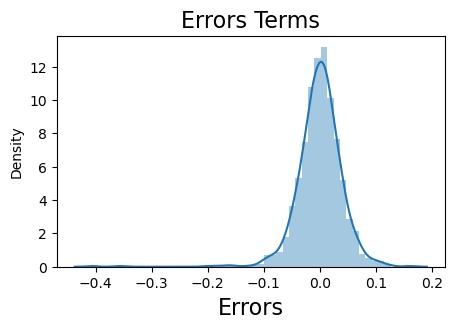

In [66]:
plt.figure(figsize=(5,3))
sns.distplot(res, )
plt.title('Errors Terms', fontsize = 16)
plt.xlabel('Errors', fontsize = 16)
plt.show()

### Lets us explore other regularization techniques like Ridge/Lasso

### 2. Ridge Regression

In [67]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
print(ridge_cv.best_params_)

{'alpha': 0.7}


In [69]:
# cv results
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results.param_alpha <= 1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.004401       0.00080           0.0024    4.902916e-04      0.0001   
1       0.003401       0.00049           0.0020    1.907349e-07       0.001   
2       0.003401       0.00049           0.0020    4.523674e-07        0.01   
3       0.003201       0.00040           0.0020    1.507891e-07        0.05   
4       0.003401       0.00049           0.0020    9.536743e-08         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.031273          -0.030630          -0.032576   
1   {'alpha': 0.001}          -0.031273          -0.030630          -0.032573   
2    {'alpha': 0.01}          -0.031267          -0.030625          -0.032552   
3    {'alpha': 0.05}          -0.031223          -0.030606          -0.032516   
4     {'alpha': 0.1}          -0.031163          -0.030586          -0.032509   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.027645          -0.030352        -0.030495        0.001618   
1          -0.027640          -0.030351        -0.030493        0.001619   
2          -0.027597          -0.030346        -0.030477        0.001629   
3          -0.027460          -0.030343        -0.030430        0.001664   
4          -0.027325          -0.030354        -0.030387        0.001704   

   rank_test_score  split0_train_score  split1_train_score  \
0               15           -0.028031           -0.025873   
1               14           -0.028031           -0.025874   
2               13           -0.028032           -0.025879   
3               11           -0.028031           -0.025903   
4               10           -0.028031           -0.025929   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.027201           -0.029063           -0.028466   
1           -0.027199           -0.029063           -0.028466   
2           -0.027186           -0.029057           -0.028466   
3           -0.027156           -0.029054           -0.028473   
4           -0.027137           -0.029065           -0.028483   

   mean_train_score  std_train_score  
0         -0.027727         0.001108  
1         -0.027726         0.001108  
2         -0.027724         0.001106  
3         -0.027724         0.001101  
4         -0.027729         0.001099

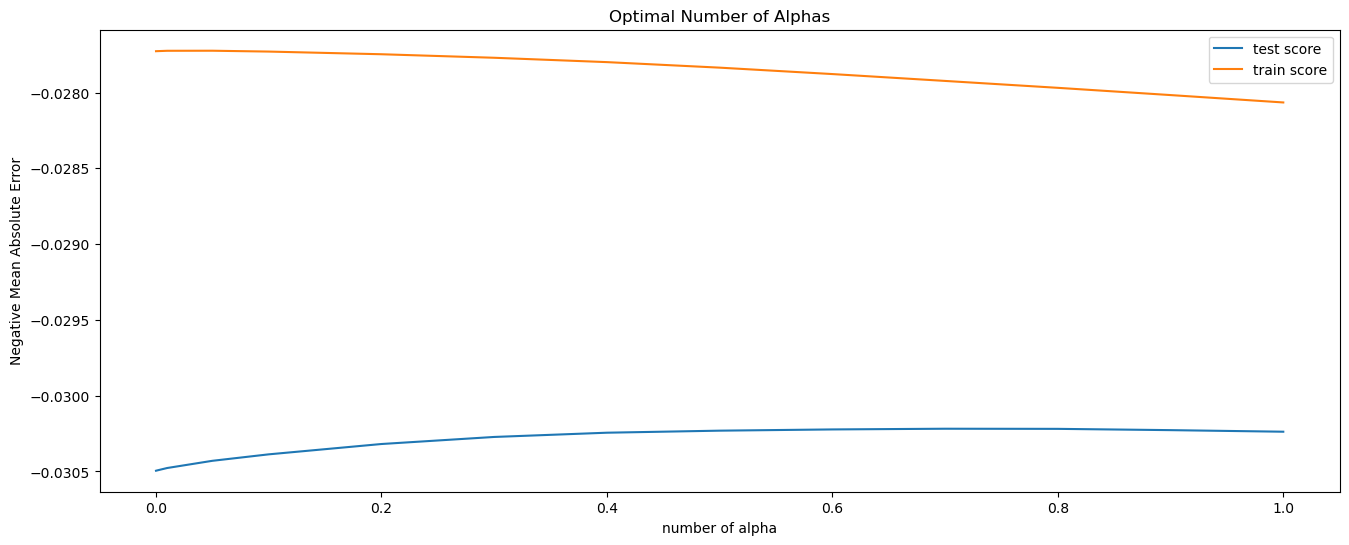

In [70]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('number of alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Optimal Number of Alphas")
plt.legend(['test score', 'train score'], loc='upper right')

#### Negative Mean Absolute Error Stabilizes after alpha = 0.7, we will choose this optimal value for Ridge regression.

In [71]:
#Fitting Ridge model for alpha = 3 and printing coefficients which have been penalised
alpha = ridge_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.intercept_)
print(ridge.coef_)


-0.01113959618756144
[-0.04221473 -0.05178128  0.08036995  0.17528535  0.07449886  0.05638392
  0.03116782  0.02566561 -0.02409088  0.02037144  0.14008405  0.04145955
  0.13382427  0.04678049  0.0543164   0.02623963  0.06373783  0.02464545
  0.03077559  0.02697651  0.07872492  0.02073911 -0.02418223  0.09036013
  0.10344698  0.10754746  0.0840224  -0.02014221  0.04019012  0.05249239
 -0.0239305  -0.04184763  0.04375164  0.04705841  0.04122856  0.04284325
  0.03138179 -0.05517609  0.02685307 -0.01649513 -0.01818121 -0.01649513
  0.02438199 -0.02698456 -0.02634568  0.01938433  0.02342682  0.04507841
  0.0473166   0.03506759]


In [72]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metrics2 = []

print(f'R2_Score Train : {r2_score(y_train, y_pred_train)}')
print(f'R2_Score Test : {r2_score(y_test, y_pred_test)}')
metrics2.append(r2_score(y_train, y_pred_train))
metrics2.append(r2_score(y_test, y_pred_test))

print(f'RSS-Train : {np.sum(np.square(y_train-y_pred_train))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_pred_test))}')
metrics2.append(np.sum(np.square(y_train-y_pred_train)))
metrics2.append(np.sum(np.square(y_test-y_pred_test)))

print(f'RMSE-Train : {mean_squared_error(y_train, y_pred_train)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_pred_test)}')
metrics2.append(mean_squared_error(y_train, y_pred_train))
metrics2.append(mean_squared_error(y_test, y_pred_test))

R2_Score Train : 0.9008247762421211
R2_Score Test : 0.8767946006211117
RSS-Train : 1.684163539936858
RSS-Test : 0.9395127523027456
RMSE-Train : 0.0016495235454817413
RMSE-Test : 0.0021450062837962227


In [73]:
ridge_coeff = pd.DataFrame(list(zip(X_train_rfe, ridge.coef_)), columns=['Features', 'Coefficients'])
ridge_coeff = ridge_coeff.sort_values(by='Coefficients', ascending=False).head(10)
ridge_coeff

Features  Coefficients
3   OverallQual      0.175285
10     1stFlrSF      0.140084
12    GrLivArea      0.133824
25  MSZoning_RL      0.107547
24  MSZoning_RH      0.103447
23  MSZoning_FV      0.090360
26  MSZoning_RM      0.084022
2       LotArea      0.080370
20   GarageArea      0.078725
4   OverallCond      0.074499

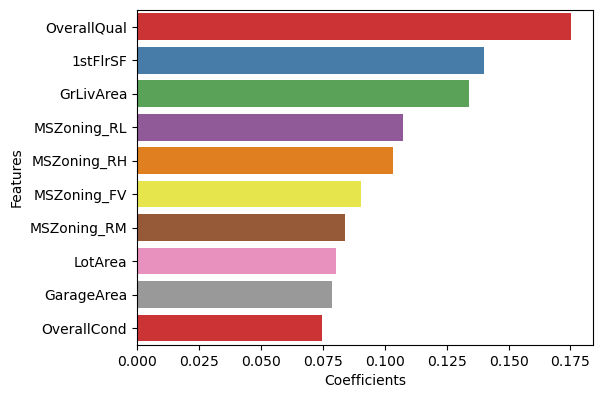

In [74]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficients', palette='Set1', data = ridge_coeff)
plt.show()

### 3. Lasso Regression

In [75]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

folds = 5
lasso_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

lasso_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
print(lasso_cv.best_params_)

{'alpha': 0.0001}


In [77]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results = cv_results[cv_results.param_alpha <= 0.01]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009617  3.252694e-03         0.003000    8.945768e-04      0.0001   
1       0.004001  2.431402e-07         0.002001    6.106495e-07       0.001   
2       0.003801  4.001380e-04         0.002000    1.168008e-07        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.030288          -0.030802          -0.032990   
1   {'alpha': 0.001}          -0.032863          -0.036937          -0.037078   
2    {'alpha': 0.01}          -0.066375          -0.068165          -0.063892   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.025872          -0.031061        -0.030203        0.002351   
1          -0.030474          -0.038243        -0.035119        0.002952   
2          -0.063171          -0.071799        -0.066681        0.003117   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.028309           -0.026473   
1                2           -0.034754           -0.033248   
2                3           -0.066699           -0.066307   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.027034           -0.029376           -0.028785   
1           -0.033397           -0.035126           -0.034823   
2           -0.066817           -0.066694           -0.065574   

   mean_train_score  std_train_score  
0         -0.027996         0.001083  
1         -0.034270         0.000785  
2         -0.066418         0.000456

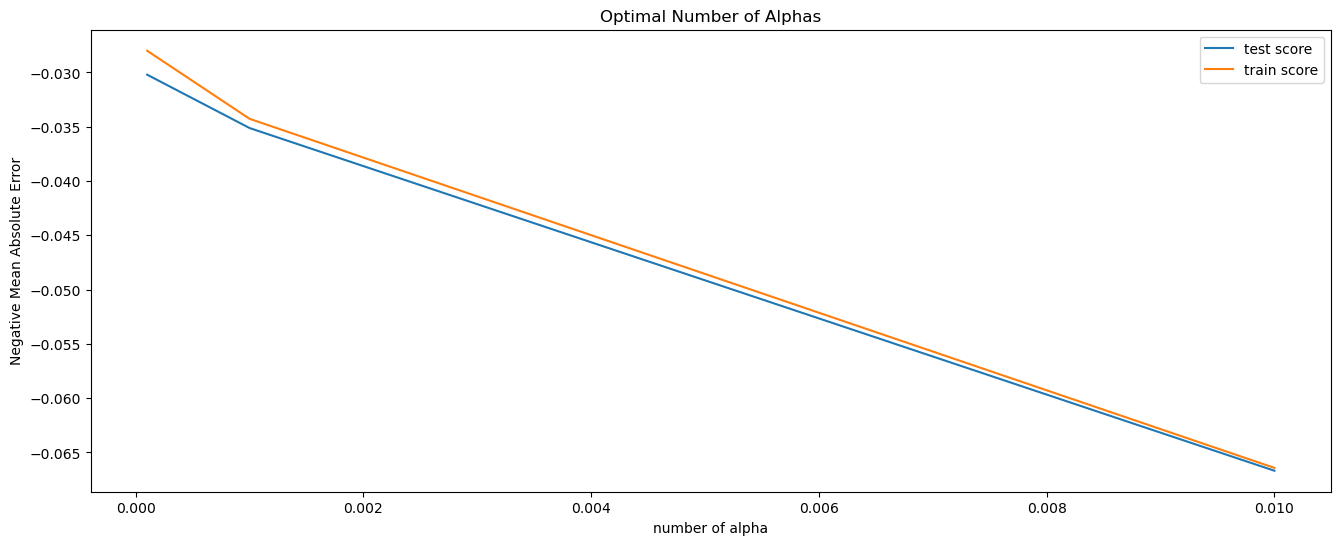

In [78]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_alpha"], cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"], cv_results["mean_train_score"])
plt.xlabel('number of alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Optimal Number of Alphas")
plt.legend(['test score', 'train score'], loc='upper right')

#### Negative Mean Absolute Error Stabilizes after alpha = 0.0001, we will choose this optimal value for Lasso regression.

In [79]:
alpha = lasso_cv.best_params_['alpha']
print(alpha)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)
print(round(lasso.intercept_, 4))
print(lasso.coef_)

0.0001
0.0162
[-0.03826594 -0.0272215   0.05366732  0.191493    0.07327341  0.04817405
  0.0298466   0.02288534 -0.          0.01943267  0.05576891  0.
  0.23679756  0.04326032  0.05315411  0.02446332  0.05490939  0.02305861
  0.03038215  0.02661622  0.0784216   0.01860797 -0.02601527  0.07273534
  0.08046637  0.08909343  0.06122345 -0.00790049  0.0376513   0.04714459
 -0.02448643 -0.02114057  0.03811206  0.04133867  0.03701711  0.03360615
  0.02325122 -0.01959543  0.02567744 -0.          0.         -0.
  0.00072222 -0.02459134 -0.02211087  0.01325361  0.01865536  0.02946018
  0.01769266  0.        ]


In [80]:
max_coef = max(lasso.coef_)
min_coef = min(lasso.coef_)

len(lasso.coef_[(lasso.coef_ >= min_coef) & (lasso.coef_ <= max_coef) & (lasso.coef_  != 0)])

44

In [81]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metrics3 = []

print(f'R2_Score Train : {r2_score(y_train, y_pred_train)}')
print(f'R2_Score Test : {r2_score(y_test, y_pred_test)}')
metrics3.append(r2_score(y_train, y_pred_train))
metrics3.append(r2_score(y_test, y_pred_test))

print(f'RSS-Train : {np.sum(np.square(y_train-y_pred_train))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_pred_test))}')
metrics3.append(np.sum(np.square(y_train-y_pred_train)))
metrics3.append(np.sum(np.square(y_test-y_pred_test)))

print(f'RMSE-Train : {mean_squared_error(y_train, y_pred_train)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_pred_test)}')
metrics3.append(mean_squared_error(y_train, y_pred_train))
metrics3.append(mean_squared_error(y_test, y_pred_test))

R2_Score Train : 0.8975208586721045
R2_Score Test : 0.8796634290137014
RSS-Train : 1.7402696650307943
RSS-Test : 0.9176362690268991
RMSE-Train : 0.0017044756758381923
RMSE-Test : 0.002095059974947258


In [82]:
lasso_coeff = pd.DataFrame(list(zip(X_train_rfe.columns, lasso.coef_)), columns=['Feature', 'Coefficients'])
lasso_coeff = lasso_coeff[lasso_coeff.Coefficients != 0]
lasso_coeff = lasso_coeff.sort_values(by='Coefficients', ascending=False).head(10)
lasso_coeff

Feature  Coefficients
12     GrLivArea      0.236798
3    OverallQual      0.191493
25   MSZoning_RL      0.089093
24   MSZoning_RH      0.080466
20    GarageArea      0.078422
4    OverallCond      0.073273
23   MSZoning_FV      0.072735
26   MSZoning_RM      0.061223
10      1stFlrSF      0.055769
16  BedroomAbvGr      0.054909

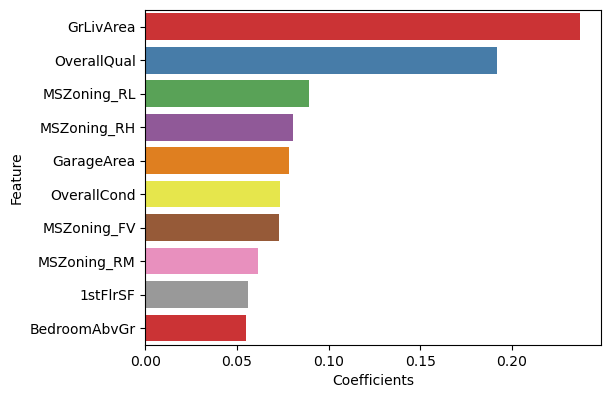

In [83]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Feature', x='Coefficients', palette='Set1', data = lasso_coeff)
plt.show()

## Creating a Final Metric Table which contains Scores for Linear, Ridge and Lasso regression

In [84]:
lr_table = { 'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
            'Linear Regression' : pd.Series(metrics1),
            'Ridge Regression' : pd.Series(metrics2),
            'Lasso Regression' : pd.Series(metrics3)
           }

final_metric = pd.DataFrame(lr_table)

In [85]:
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.902029          0.900825          0.897521
1   R2 Score (Test)           0.876515          0.876795          0.879663
2       RSS (Train)           1.663720          1.684164          1.740270
3        RSS (Test)           0.941648          0.939513          0.917636
4      RMSE (Train)           0.001630          0.001650          0.001704
5       RMSE (Test)           0.002150          0.002145          0.002095

## Inference after building Ridge and Lasso Model
-  We can observe that the `R2_Score` for `test data increases slightly` in `Lasso Regression` comapre to `Ridge Regression`
-  Also The `RMSE` score decreases slightly in Lasso compare to Ridge
-  `Lasso` also helps to `reduce the features` by bringing their `coefficeint values to 0`, thus helping in feature elimination and allowing us to choose between `most important predictors`.




## Best Fit Line Equation :
$ log(SalePrice) = 0.0162 + 0.2367 \times GrLivArea + 0.1914 \times OverallQual + 0.0890 \times MSZoning_RL + 0.0804 \times MSZoning_RH + 0.0784 \times GarageArea + 0.0732 \times OverallCond + 0.0727 \times MSZoning_FV	 + 0.0612 \times MSZoning_RM 
+ 0.0557 \times 1stFlrSF + 0.0549 \times BedroomAbvGr $ 


### Feature which holds significance in contributing towards buying the house are as follows:
-  GrLivArea
-  OverallQual
-  MSZoning_RL
-  MSZoning_RH
-  GarageArea
-  OverallCond
-  MSZoning_FV
-  MSZoning_RM
-  1stFlrSF
-  BedroomAbvGr

### Q1 What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [86]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [87]:
ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_rfe, y_train) 

print(ridge_cv.best_params_['alpha'])
print(ridge_cv.best_params_['alpha'] * 2)


alpha = ridge_cv.best_params_['alpha']*2 #Doubling the alpha value
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe, y_train)

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

# print(f'After Doubling the Alpha Value from {ridge_cv.best_params_['alpha']} to {ridge_cv.best_params_['alpha']*2}')
print(f'R2_Score Train : {r2_score(y_train, y_pred_train)}')
print(f'R2_Score Test : {r2_score(y_test, y_pred_test)}')

print(f'RSS-Train : {np.sum(np.square(y_train-y_pred_train))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_pred_test))}')

print(f'RMSE-Train : {mean_squared_error(y_train, y_pred_train)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_pred_test)}')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.7
1.4
R2_Score Train : 0.8989643418276633
R2_Score Test : 0.875718348240667
RSS-Train : 1.715756872329262
RSS-Test : 0.947719802003664
RMSE-Train : 0.001680467063985565
RMSE-Test : 0.0021637438401910136


In [88]:
lasso = Lasso()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_cv.fit(X_train_rfe, y_train) 

print(lasso_cv.best_params_['alpha'])
print(lasso_cv.best_params_['alpha'] * 2)


alpha = lasso_cv.best_params_['alpha']*2 #Doubling the alpha value
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

# print(f'After Doubling the Alpha Value from {ridge_cv.best_params_['alpha']} to {ridge_cv.best_params_['alpha']*2}')
print(f'R2_Score Train : {r2_score(y_train, y_pred_train)}')
print(f'R2_Score Test : {r2_score(y_test, y_pred_test)}')

print(f'RSS-Train : {np.sum(np.square(y_train-y_pred_train))}')
print(f'RSS-Test : {np.sum(np.square(y_test-y_pred_test))}')

print(f'RMSE-Train : {mean_squared_error(y_train, y_pred_train)}')
print(f'RMSE-Test : {mean_squared_error(y_test, y_pred_test)}')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
0.0001
0.0002
R2_Score Train : 0.8890773796033704
R2_Score Test : 0.8733145073940783
RSS-Train : 1.8836542631084194
RSS-Test : 0.9660504850846132
RMSE-Train : 0.0018449111293912042
RMSE-Test : 0.002205594714805053


## Rebuilding a Lasso Model again by dropping the first five important features 

### Q3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [89]:
drop_ftr = ['GrLivArea','OverallQual','MSZoning_RL','MSZoning_RH','GarageArea']

X_train_rfe.drop(drop_ftr, axis=1, inplace=True)
print(X_train_rfe.shape)

X_test_rfe.drop(drop_ftr, axis=1, inplace=True)
print(X_test_rfe.shape)

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

folds = 5
lasso_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

lasso_cv.fit(X_train_rfe, y_train)

(1021, 45)
(438, 45)
Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
print(lasso_cv.best_params_)

{'alpha': 0.0001}


In [91]:
alpha = lasso_cv.best_params_['alpha']
print(alpha)
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe, y_train)
print(lasso.intercept_)
print(lasso.coef_)

0.0001
0.13280691150654667
[-0.04434922 -0.02194099  0.06210724  0.094484    0.08527894  0.03917372
  0.02334639 -0.          0.01670891  0.35713888  0.11825752  0.0401094
  0.06875116  0.03071123  0.05038459  0.05440841  0.04113965  0.04417563
  0.01686584 -0.02812424 -0.         -0.02143008  0.          0.02957501
  0.0474541  -0.0354838  -0.04893387  0.05104387  0.06007515  0.04455359
  0.05778947  0.02661139 -0.0037425   0.02016219 -0.          0.
 -0.          0.00177891 -0.01889352 -0.02115178  0.0095847   0.02492941
  0.04126971  0.02851789  0.        ]


In [92]:
lasso_coeff = pd.DataFrame(list(zip(X_train_rfe.columns, lasso.coef_)), columns=['Feature', 'Coefficients'])
lasso_coeff = lasso_coeff[lasso_coeff.Coefficients != 0]
lasso_coeff.sort_values(by='Coefficients', ascending=False).head(10)

Feature  Coefficients
9               1stFlrSF      0.357139
10              2ndFlrSF      0.118258
3            OverallCond      0.094484
4               BsmtQual      0.085279
12              FullBath      0.068751
2                LotArea      0.062107
28  Neighborhood_NridgHt      0.060075
30  Neighborhood_StoneBr      0.057789
15           KitchenQual      0.054408
27  Neighborhood_NoRidge      0.051044

### Please take a look after dropping first 5 imp variable we get a different set of new variable which are imp in prediction.